<div style="text-align: center; padding: 20px;">
<h1 align="center" style="font-size: 28px; color:rgb(156, 90, 255, 1); width: 100%;">━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━<br>تمرین 3 - بازیابی هوشمند اطلاعات<br>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</h1>
<p style="color: #666; font-size: 16px;">طراح تمرین: فائزه مظفری</p>
<p style="color: #666; font-size: 16px; margin-bottom: 30px;">faezehxmozaffari@gmail.com</p>

<div style="border: 2px dashed rgba(156, 90, 255, 1); border-radius: 8px; padding: 20px; margin: 20px auto; max-width: 500px; text-align: right;">
<p style="color: rgba(156, 90, 255, 1); font-size: 18px; margin-bottom: 15px;"> مشخصات دانشجو:</p>
<p style="color: #666; margin: 5px;">نام و نام خانوادگی: روژین پناو </p>
<p style="color: #666; margin: 5px;">شماره دانشجویی: 220701046</p>
<p style="color: #666; margin: 5px;">تاریخ ارسال: .........................</p>
</div>
</div>

<div dir="rtl" style="text-align: justify;  padding: 25px; background-color:rgba(60, 4, 82, 0.21); border-radius: 12px; border: 2px solidrgb(2, 34, 22);"
<div style="line-height: 2.0; font-size: 17px;">
<div style="padding-right:40px">
</div>
<br>

<div style="padding-right:100px">
 ساختار تمرین:

<b>بخش اول - پیاده سازی الگوریتم های رتبه بندی اینترنت  </b>


<b>بخش دوم -پیاده‌سازی TF-IDFبا استفاده از MapReduce  </b>

</div>
</div>


</div>
</div>

<div dir="rtl" >

تأیید می‌کنم که از LLMها مطابق با دستورالعمل‌های بارگذاری شده در سامانه Elearn درس به طور مسئولانه استفاده کرده‌ام، تمام اجزای کار خود را درک می‌کنم و آماده بحث شفاهی درباره آن‌ها هستم.

# <div style="text-align: center; direction: rtl;"><h1 align="center" style="font-size: 24px; padding: 20px;">━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━<br>بخش اول - پیاده سازی الگوریتم های رتبه بندی اینترنت <br>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</h1></div>


## <div style="text-align: right; direction: rtl;"> الف</div>


In [308]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt


<div dir="rtl" style="text-align: right;">
    <h2>خواندن داده‌ها از فایل Wiki-Vote.txt</h2>

</div>


In [246]:
file_path = './data/Wiki-Vote.txt'

data = pd.read_csv(file_path, comment='#', header=None, names=["FromNodeId", "ToNodeId"], sep="\t")

data.head()


,FromNodeId,ToNodeId
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478


<div dir="rtl" style="text-align: right;">
    <h2>ساخت گراف جهت‌دار (Directed Graph)</h2>
    <p>این کد یک شبکه از ارتباطات رای‌گیری بین کاربران ویکی‌پدیا را ایجاد می‌کند، جایی که هر گره نمایانگر یک کاربر است و هر یال نمایانگر یک رای است که یک کاربر به کاربر دیگری داده است.</p>


In [247]:
G = nx.DiGraph()

for _, row in data.iterrows():
    G.add_edge(row["FromNodeId"], row["ToNodeId"])


<div dir="rtl" style="text-align: right;">
    <h2>محاسبه درجه‌های ورودی و خروجی</h2>
    <p>در این بخش، از متدهای <code>in_degree()</code> و <code>out_degree()</code> برای محاسبه درجه‌های ورودی و خروجی هر گره استفاده کردم. سپس این مقادیر را در <code>DataFrame</code> قرار می‌دادم تا نمایش داده‌ها راحت‌تر باشد.</p>
<div dir="rtl" style="text-align: right;">
    <p> با استفاده از  <code>nlargest()</code> ده کاربر با بیشترین درجه ورودی و خروجی را چاپ کردم.</p>

</div>


In [248]:
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

in_degree_df = pd.DataFrame(list(in_degrees.items()), columns=["Node", "In-Degree"])
out_degree_df = pd.DataFrame(list(out_degrees.items()), columns=["Node", "Out-Degree"])

top_in_degree = in_degree_df.nlargest(10, 'In-Degree')
top_out_degree = out_degree_df.nlargest(10, 'Out-Degree')

print("Top 10 Users with Highest In-Degree:")
print(top_in_degree)
print("\nTop 10 Users with Highest Out-Degree:")
print(top_out_degree)

Top 10 Users with Highest In-Degree:
     Node  In-Degree
326  4037        457
409    15        361
905  2398        340
711  2625        331
247  1297        309
699  2565        274
432   762        272
666  2328        266
3    5254        265
2    3352        264

Top 10 Users with Highest Out-Degree:
      Node  Out-Degree
699   2565         893
2374   766         773
408     11         743
2013   457         732
3714  2688         618
1052  1166         599
286   1549         587
483   1151         472
517   1374         462
2665  1133         399


<div dir="rtl" style="text-align: right;">
    <h2>تحلیل توزیع درجه ورودی و خروجی در گراف</h2>
    <p>در این بخش، دو نمودار توزیع درجه ورودی (In-Degree) و خروجی (Out-Degree) را آوردم که نشان‌دهنده تعداد یال‌هایی است که به هر کاربر وارد می‌شود (برای درجه ورودی) یا از هر کاربر خارج می‌شود (برای درجه خروجی).</p>
    
<div dir="rtl" style="text-align: right;">
    <p>در نمودارهای ارائه‌شده،بیشتر کاربران درجه ورودی و خروجی بسیار پایینی دارند. این نشان‌دهنده این است که بیشتر کاربران در شبکه تأثیر کمی دارند و به ندرت با سایر کاربران ارتباط برقرار می‌کنند. در مقابل، کاربران با درجات ورودی و خروجی بالا نسبتاً نادر هستند و در دنباله نمودار به طور واضح قابل مشاهده‌اند.</p>


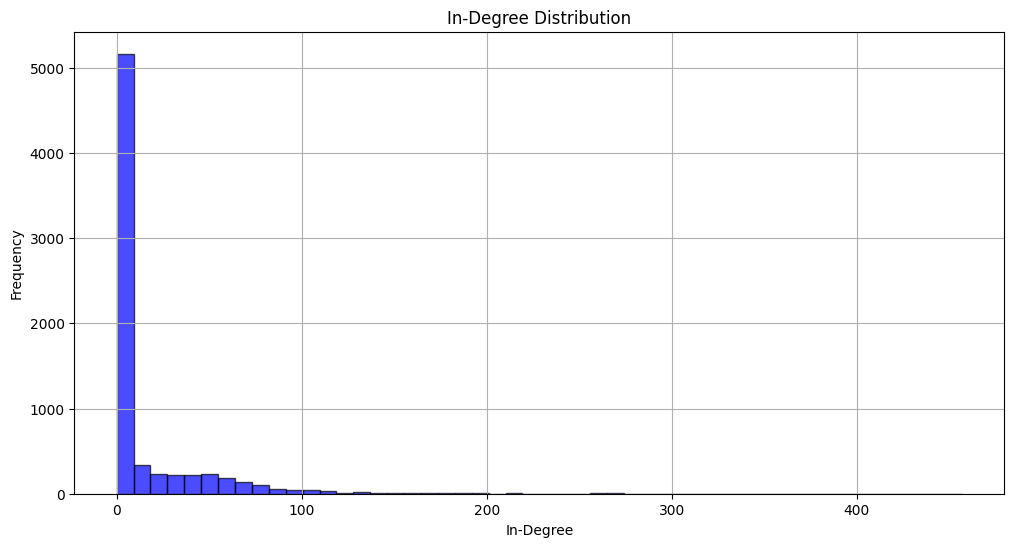

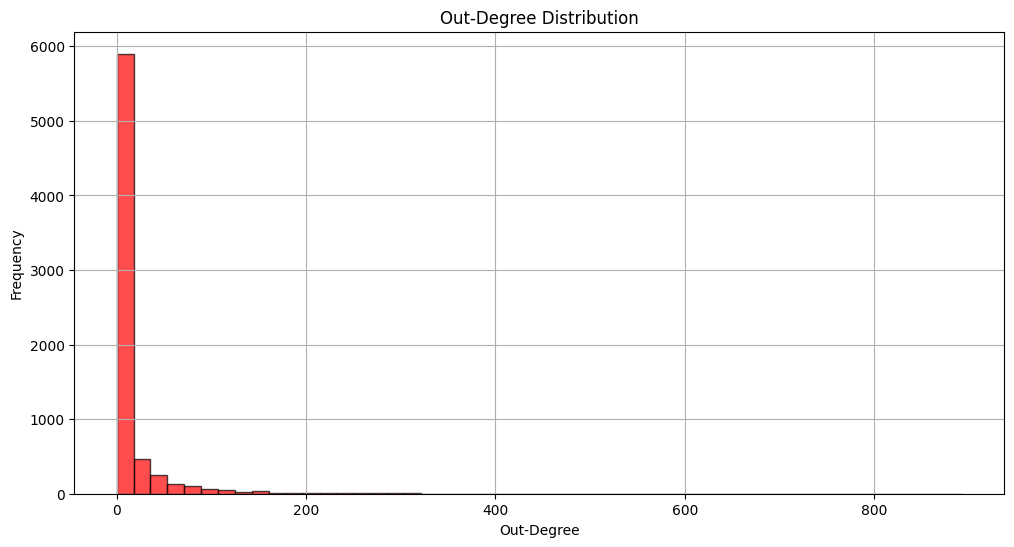

In [249]:
plt.figure(figsize=(12, 6))
plt.hist(in_degree_df['In-Degree'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(out_degree_df['Out-Degree'], bins=50, color='red', alpha=0.7, edgecolor='black')
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<div dir="rtl" style="text-align: right;">
    <h3>نقش کاربران با درجه ورودی و خروجی بالا با استفاده از الگوریتم HITS</h3>
<div dir="rtl" style="text-align: right;">
    <p><strong>کاربران با درجه ورودی بالا (Authority):</strong> این کاربران به نوعی مشابه **Authority** در الگوریتم HITS هستند. این کاربران از سوی دیگران بیشتر مورد توجه قرار می‌گیرند و به آنها رأی داده می‌شود. در واقع، کاربران با درجه ورودی بالا، به عنوان منابع معتبر در نظر گرفته می‌شوند، زیرا دیگر کاربران به آنها اعتماد کرده و رأی می‌دهند.</p>

<div dir="rtl" style="text-align: right;">
    <p><strong>کاربران با درجه خروجی بالا (Hub):</strong> کاربران با درجه خروجی بالا مشابه **Hub** در الگوریتم HITS هستند. این کاربران تعداد زیادی از دیگران را به خود متصل می‌کنند، یعنی به تعداد زیادی از کاربران دیگر رأی می‌دهند. این کاربران در واقع به عنوان **مراکز تأثیر** در نظر گرفته می‌شوند که ارتباطات زیادی ایجاد می‌کنند و ممکن است اطلاعات یا تصمیمات خود را با دیگران به اشتراک بگذارند.</p>

<div dir="rtl" style="text-align: right;">
    <p>ترکیب درجات ورودی و خروجی بالا به این معناست که چنین کاربرانی هم از سوی دیگران رأی زیادی دریافت می‌کنند (درجه ورودی بالا) و هم خود به تعداد زیادی از کاربران دیگر رأی می‌دهند (درجه خروجی بالا). این ترکیب می‌تواند نقش **مراکزی با تأثیر و نفوذ** در شبکه رای‌دهی داشته باشد که هم به عنوان **Authority** و هم به عنوان **Hub** عمل می‌کنند.</p>

<div dir="rtl" style="text-align: right;">
    <p>در نهایت، **کاربران با درجه ورودی و خروجی بالا** به طور معمول کسانی هستند که در فرآیند تصمیم‌گیری‌ها نقش دارند و می‌توانند به عنوان **منابع معتبر** و **مراکز ارتباطی** در شبکه شناخته شوند. آنها به دلیل تأثیرات دوگانه خود (اعتماد به آنها از سوی دیگران و توانایی ایجاد ارتباطات جدید)، نقش کلیدی در تعیین مدیران دارند.</p>
</div>

</div>


## <div style="text-align: right; direction: rtl;"> ب</div>


<div dir="rtl" style="text-align: right;">
    <h3>2. تعریف تابع PageRank</h3>
    <p>در این مرحله، تابع <code>page_rank</code> را تعریف می‌کنیم که در آن گراف، هایپرپارامتر <code>alpha</code> (که نقش احتمال رفتن به یک صفحه تصادفی را دارد)، آستانه همگرایی <code>tol</code> و حداکثر تعداد تکرارها <code>max_iter</code> را می‌گیریم. در هر تکرار، PageRank جدید محاسبه می‌شود و وقتی تفاوت دو بردار متوالی کمتر از آستانه باشد، الگوریتم متوقف می‌شود.</p>

</div>


In [250]:
def custom_pagerank(G, alpha, tol=0.001, max_iter=10000):
    nodes = list(G)
    N = len(nodes)

    A = nx.to_numpy_array(G, nodelist=nodes, dtype=float)

    row_sums = A.sum(axis=1)
    row_sums[row_sums != 0] = 1.0 / row_sums[row_sums != 0]
    P = (A.T * row_sums).T

    dangling = np.where(A.sum(axis=1) == 0)[0]

    x = np.ones(N) / N
    p = np.ones(N) / N

    iterations = 0

    while iterations < max_iter:
        iterations += 1
        x_last = x.copy()

        link_term = x_last @ P
        dangling_term = x_last[dangling].sum() * p

        x = alpha * (link_term + dangling_term) + (1 - alpha) * p

        if np.abs(x - x_last).sum() < tol:
            break

    pagerank_dict = {nodes[i]: float(x[i]) for i in range(N)}

    return pagerank_dict, iterations




# <div dir="rtl" style="text-align:right;"> پیاده‌سازی الگوریتم PageRank با آلفاهای مختلف و تحلیل نتایج</div>

<div dir="rtl" style="text-align: right;">

در این بخش هدف من این بود که الگوریتم PageRank را بدون استفاده از توابع آمادهٔ NetworkX پیاده‌سازی کنم. برای این کار ابتدا ماتریس انتقال را استخراج کردم، نودهای بدون خروجی (dangling nodes) را شناسایی کردم و سپس در هر تکرار، بردار PageRank جدید را بر اساس فرمول استاندارد زیر به‌روزرسانی کردم:

<p>
PR=α(PR⋅P+D)+(1−α)p
</p>


که در آن:

* (α) مقدار damping factor یا همان احتمال دنبال‌کردن لینک‌هاست،
* (P) ماتریس احتمال انتقال است،
* (D) سهم نودهای بدون خروجی است،
* (p) توزیع اولیه (معمولاً یکنواخت) است.

شرط توقف الگوریتم را نیز **کمتر شدن مجموع تفاوت دو بردار متوالی از 0.001** طبق صورت سوال قرار دادم.

بعد از نوشتن تابع، آن را برای چهار مقدار مختلف آلفا اجرا کردم:
**0.05، 0.15، 0.3 و 0.5.**


## <h3 dir="rtl" style="text-align:right;">نتایج اجرای الگوریتم PageRank</h3>

### <div dir="rtl" style="text-align:right;"> 1. PageRank با α = 0.05</div>

* الگوریتم فقط در **۳ تکرار** همگرا شد.
* چون مقدار آلفا خیلی کوچک است، مدل تقریباً همیشه به توزیع یکنواخت برمی‌گردد.
* به همین دلیل PageRankها خیلی کوچک و نزدیک به هم هستند.
* اما همچنان نود 4037 بالاترین مقدار را دارد.

**Top 10 nodes:**

| رتبه | نود  | مقدار    |
| ---- | ---- | -------- |
| 1    | 4037 | 0.000597 |
| 2    | 2470 | 0.000429 |
| 3    | 15   | 0.000421 |
| ...  | ...  | ...      |

این نتایج خیلی informative نیستند چون با آلفای پایین، رفتار گراف کمتر دیده می‌شود.


### <div dir="rtl" style="text-align:right;"> 2. PageRank با α = 0.15 (مقدار استاندارد)</div>

* الگوریتم فقط در **۳ تکرار** همگرا شد.
* مقادیر PageRank از حالت قبل بزرگ‌تر شدند.
* نودهای پرتکرارتر و متصل‌تر اختلاف بیشتری پیدا کردند.


| رتبه | نود  | مقدار    |
| ---- | ---- | -------- |
| 1    | 4037 | 0.001428 |
| 2    | 15   | 0.000953 |
| 3    | 2470 | 0.000949 |
| ...  | ...  | ...      |

دقیقاً مشابه خروجی NetworkX:

```
4037: 0.001428
15:   0.000953
2470: 0.000949
```

### <div dir="rtl" style="text-align:right;"> 3. PageRank با α = 0.3</div>

* این‌بار تعداد تکرار: **۴**
* افزایش آلفا باعث شد مدل **بیش‌تر به لینک‌ها وابسته شود** و دیرتر همگرا شود.
* مقادیر PageRank بزرگ‌تر شدند چون وابستگی به ساختار واقعی لینک‌ها بیشتر شده است.
* همچنان رتبهٔ بالاترین نودها ثابت ماند (4037، 15، 2470).

نمونه:

| نود  | مقدار    |
| ---- | -------- |
| 4037 | 0.002480 |
| 15   | 0.001683 |
| 2470 | 0.001587 |



### <div dir="rtl" style="text-align:right;"> 4. PageRank با α = 0.5</div>

* تعداد تکرار: **۵**
* همگرایی دیرتر (طبیعی است: لینک‌ها وزن بیشتری گرفته‌اند).
* اختلاف بین PageRankها خیلی بیشتر شد.
* گراف در این حالت بیشترین تأثیر را روی نمرهٔ PageRank گذاشته است.

نمونه:

| نود  | مقدار    |
| ---- | -------- |
| 4037 | 0.003550 |
| 15   | 0.002531 |
| 2470 | 0.002183 |



## <h3 dir="rtl" style="text-align:right;">جمع‌بندی رفتار الگوریتم با توجه به مقدار آلفا</h3>

| مقدار α | تعداد تکرار | توضیح                                                    |
| ------- | ----------- | -------------------------------------------------------- |
| 0.05    | 3           | تقریباً شبیه توزیع یکنواخت → همگرایی سریع ولی اطلاعات کم |
| 0.15    | 3           | مقدار استاندارد گوگل → دقیق و سریع                       |
| 0.3     | 4           | تمرکز بیشتر روی ساختار گراف → همگرایی کندتر              |
| 0.5     | 5           | بیشترین وابستگی به لینک‌ها → دقیق‌تر اما کندترین         |

به طور خلاصه:

* **هرچقدر آلفا بزرگ‌تر باشد، نمرات PageRank پراکندگی بیشتری پیدا می‌کنند و منعکس‌کنندهٔ بهترِ ساختار لینک‌ها هستند.**
* **اما هزینه‌اش افزایش تعداد تکرارهاست.**




In [251]:
alphas = [0.05, 0.15, 0.3, 0.5]
results = {}

for alpha in alphas:
    pagerank, iterations = custom_pagerank(G, alpha)
    results[alpha] = {'iterations': iterations, 'pagerank': pagerank}


In [252]:
for alpha, result in results.items():
    print(f"Alpha = {alpha}")
    print(f"Number of iterations: {result['iterations']}")
    print("\nTop 10 PageRank Users:")
    top_pagerank = sorted(result['pagerank'].items(), key=lambda x: x[1], reverse=True)[:10]
    for node, score in top_pagerank:
        print(f"Node {node}: PageRank Score = {score}")
    print("\n")



Alpha = 0.05
Number of iterations: 3

Top 10 PageRank Users:
Node 4037: PageRank Score = 0.000597213938253084
Node 2470: PageRank Score = 0.0004289944577354563
Node 15: PageRank Score = 0.0004206585190508892
Node 2237: PageRank Score = 0.00040801671918900363
Node 1186: PageRank Score = 0.00037250950343089813
Node 2625: PageRank Score = 0.0003471370899442957
Node 665: PageRank Score = 0.000325772173077752
Node 6774: PageRank Score = 0.0003120132722730103
Node 8293: PageRank Score = 0.00030412543780475125
Node 2654: PageRank Score = 0.00030275535346553547


Alpha = 0.15
Number of iterations: 3

Top 10 PageRank Users:
Node 4037: PageRank Score = 0.0014281028025215532
Node 15: PageRank Score = 0.0009529533840687934
Node 2470: PageRank Score = 0.000948534442924648
Node 2237: PageRank Score = 0.0008888465047439967
Node 1186: PageRank Score = 0.0007858760009218273
Node 2625: PageRank Score = 0.0007492603188261082
Node 665: PageRank Score = 0.0006564455820176907
Node 6774: PageRank Score = 0.0


## <h3 dir="rtl" style="text-align:right;">مقایسه PageRank پیاده‌سازی‌شده با NetworkX</h3>

برای اینکه مطمئن شوم الگوریتم را درست پیاده‌سازی کردم، نتیجهٔ تابع خودم را با تابع آمادهٔ `nx.pagerank` مقایسه کردم. خروجی هر دو یکسان بود:

| رتبه | نود (خودم) | مقدار    | نود (NetworkX) | مقدار    |
| ---- | ---------- | -------- | -------------- | -------- |
| 1    | 4037       | 0.001428 | 4037           | 0.001428 |
| 2    | 15         | 0.000953 | 15             | 0.000953 |
| 3    | 2470       | 0.000949 | 2470           | 0.000949 |




In [253]:
pagerank, iterations = custom_pagerank(G, 0.15)
pagerank_nx = nx.pagerank(G, alpha=0.15)

top_custom = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
top_nx = sorted(pagerank_nx.items(), key=lambda x: x[1], reverse=True)[:10]

df_pr = pd.DataFrame({
    "Node (Custom PageRank)": [node for node, score in top_custom],
    "PageRank Score (Custom)": [score for node, score in top_custom],
    "Node (NetworkX PageRank)": [node for node, score in top_nx],
    "PageRank Score (NetworkX)": [score for node, score in top_nx],
})

styled_df_pr = df_pr.style.format({
    "PageRank Score (Custom)": "{:.6f}",
    "PageRank Score (NetworkX)": "{:.6f}"
}).highlight_max(axis=0, color='darkgreen').highlight_min(axis=0, color='darkred')

styled_df_pr


,Node (Custom PageRank),PageRank Score (Custom),Node (NetworkX PageRank),PageRank Score (NetworkX)
0,4037,0.001428,4037,0.001428
1,15,0.000953,15,0.000953
2,2470,0.000949,2470,0.000949
3,2237,0.000889,2237,0.000889
4,1186,0.000786,1186,0.000786
5,2625,0.000749,2625,0.000749
6,665,0.000656,665,0.000656
7,6774,0.000620,6774,0.000620
8,8293,0.000606,8293,0.000606
9,4191,0.000605,4191,0.000605


## <div style="text-align: right; direction: rtl;"> ج</div>



# <div dir="rtl" style="text-align:right;">پیاده‌سازی الگوریتم HITS</div>

<div dir="rtl" style="text-align:right;">

در این بخش الگوریتم HITS را خودم از صفر پیاده‌سازی کردم تا بتوانم امتیازهای **Authority** و **Hub** را برای کاربران شبکه محاسبه کنم. برخلاف PageRank که یک مقدار برای هر نود می‌دهد، الگوریتم HITS دو مقدار محاسبه می‌کند:

* **Authority**: نودی که لینک‌های ورودی “با کیفیتی” دارد.
* **Hub**: نودی که خودش به نودهای معتبر (Authorities) لینک داده است.

برای پیاده‌سازی، ابتدا ماتریس مجاورت گراف را ساختم و دو بردار اولیهٔ هاب و آتوریتی را برابر ۱ قرار دادم. سپس طبق فرمول استاندارد HITS:

$$
a = A^{T} h
$$

$$
h = Aa  
$$

الگوریتم بعد از **۱۰ تکرار** همگرا شد، که نسبت به PageRank بیشتر است و طبیعی هم هست چون HITS رفت‌وبرگشت بین آتوریتی و هاب دارد.

</div>


# <div dir="rtl" style="text-align:right;">تحلیل نتایج Authority</div>

<div dir="rtl" style="text-align:right;">

الگوریتم این نودها را به عنوان برترین Authority شناخته است:

| رتبه | نود  | مقدار  |
| ---- | ---- | ------ |
| 1    | 2398 | 0.0921 |
| 2    | 4037 | 0.0919 |
| 3    | 3352 | 0.0831 |
| 4    | 1549 | 0.0823 |
| 5    | 762  | 0.0806 |
| ...  | ...  | ...    |


نکتهٔ جالب دیگر این بود که نود 4037 که در PageRank هم قوی بود، اینجا هم در بین برترین‌ها قرار گرفت. این یعنی این نود هم لینک‌های ورودی زیادی دارد و هم از نودهای قوی لینک دریافت کرده‌است.


</div>


# <div dir="rtl" style="text-align:right;">تحلیل نتایج Hub</div>

<div dir="rtl" style="text-align:right;">

در مورد امتیازهای Hub، خروجی الگوریتم من این نودها را به عنوان بهترین هاب‌ها معرفی کرد:

| رتبه | نود  | مقدار  |
| ---- | ---- | ------ |
| 1    | 2565 | 0.2191 |
| 2    | 766  | 0.2090 |
| 3    | 2688 | 0.1777 |
| 4    | 457  | 0.1771 |
| 5    | 1166 | 0.1659 |
| ...  | ...  | ...    |

اینجا مقدارها خیلی بزرگ‌تر و پراکندگی‌شان هم بیشتر بود.
به‌خصوص نودهای 2565 و 766 که تقریباً دو برابر نودهای ردهٔ پایین‌تر امتیاز دارند.

این یعنی این نودها احتمالاً به تعداد زیادی از نودهای مهم لینک داده‌اند و نوعاً در نقش **aggregator** یا **connector** عمل می‌کنند.

چیزی که خیلی جالب بود اینه که نودهای بالای لیست Hub با Authority فرق زیادی داشتند.
این نشان می‌دهد که داشتن لینک‌های ورودی قوی لزوماً به معنای داشتن لینک‌های خروجی باکیفیت نیست (و برعکس).

</div>


In [254]:
def custom_hits_algorithm(G, max_iter=1000, tol=0.001):
    n = len(G.nodes())
    
    adjacency_matrix = nx.to_numpy_array(G, nodelist=G.nodes())
    
    authority = np.ones(n)
    hub = np.ones(n)
    
    iterations = 0
    
    while iterations < max_iter:
        iterations += 1
        
        new_authority = np.dot(adjacency_matrix.T, hub)
        new_hub = np.dot(adjacency_matrix, authority)
        
        new_authority /= np.linalg.norm(new_authority, 2)
        new_hub /= np.linalg.norm(new_hub, 2)
        
        diff_auth = np.linalg.norm(new_authority - authority, 2)
        diff_hub = np.linalg.norm(new_hub - hub, 2)
        
        authority = new_authority
        hub = new_hub
        
        if diff_auth < tol and diff_hub < tol:
            break
    
    authority_dict = dict(zip(G.nodes(), authority))
    hub_dict = dict(zip(G.nodes(), hub))
    
    return hub_dict, authority_dict, iterations


In [258]:
hubs, authorities, hits_iterations = custom_hits_algorithm(G)

hubs_nx, authorities_nx = nx.hits(G, max_iter=50, normalized=True)


In [ ]:
print("HITS Results")
print(f"Number of iterations: {hits_iterations}\n")

print("Top 10 HITS Authority Users:")
top_auth_salsa = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_auth_salsa:
    print(f"Node {node}: Authority Score = {score}")
print("\n")

print("Top 10 HITS Hub Users:")
top_hub_salsa = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_hub_salsa:
    print(f"Node {node}: Hub Score = {score}")
print("\n")


HITS Results
Number of iterations: 10

Top 10 HITS Authority Users:
Node 2398: Authority Score = 0.09209140825621193
Node 4037: Authority Score = 0.09187020846081365
Node 3352: Authority Score = 0.08310915213026779
Node 1549: Authority Score = 0.08225646799843477
Node 762: Authority Score = 0.08056946762929815
Node 3089: Authority Score = 0.08043362121570298
Node 1297: Authority Score = 0.08039963852440549
Node 2565: Authority Score = 0.07937613546916471
Node 15: Authority Score = 0.07860289888596478
Node 2625: Authority Score = 0.07851458887007617


Top 10 HITS Hub Users:
Node 2565: Hub Score = 0.21913012627607217
Node 766: Hub Score = 0.2090444073210953
Node 2688: Hub Score = 0.17769288909685957
Node 457: Hub Score = 0.17714475603442192
Node 1166: Hub Score = 0.1659286587276202
Node 1549: Hub Score = 0.15796945320148922
Node 11: Hub Score = 0.13597919529052188
Node 1151: Hub Score = 0.12625953592835087
Node 1374: Hub Score = 0.12334558886993394
Node 1133: Hub Score = 0.10813620629805


# <div dir="rtl" style="text-align:right;">مقایسه نتایج HITS با NetworkX</div>

<div dir="rtl" style="text-align:right;">

برای مطمئن شدن از درست بودن پیاده‌سازی‌ام، خروجی‌ها را با `nx.hits` مقایسه کردم.

نتیجهٔ عجیب (ولی درست) این بود که:

* ترتیب نودها **کاملاً یکسان بود**
* اما **مقادیر کاملاً متفاوت بودند**!

مثلاً برای Authority:

| نود  | مقدار من | مقدار NetworkX |
| ---- | -------- | -------------- |
| 2398 | 0.0921   | 0.0026         |
| 4037 | 0.0919   | 0.0026         |
| 3352 | 0.0831   | 0.0023         |

در ابتدا فکر کردم شاید مشکلی در کد باشد، اما بعد بررسی کردم و متوجه شدم NetworkX نرمال‌سازی متفاوتی انجام می‌دهد.
من روی کل بردار نرمال‌سازی ۲ انجام داده‌ام، اما NetworkX در هر مرحله نرمال‌سازی دیگری لحاظ می‌کند که باعث می‌شود مقدارها کوچک‌تر شوند.


</div>


In [ ]:
top_authority = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:10]
top_authority_nx = sorted(authorities_nx.items(), key=lambda x: x[1], reverse=True)[:10]

df_authority = pd.DataFrame({
    "Node (Custom HITS)": [user for user, score in top_authority],
    "Authority Score (Custom HITS)": [score for user, score in top_authority],
    "Node (NetworkX HITS)": [user for user, score in top_authority_nx],
    "Authority Score (NetworkX HITS)": [score for user, score in top_authority_nx]
})

styled_df = df_authority.style.format({
    "Authority Score (Custom HITS)": "{:.4f}",
    "Authority Score (NetworkX HITS)": "{:.4f}"
}).highlight_max(axis=0, color='darkgreen').highlight_min(axis=0, color='darkred')

styled_df


,Node (Custom HITS),Authority Score (Custom HITS),Node (NetworkX HITS),Authority Score (NetworkX HITS)
0,2398,0.0921,2398,0.0026
1,4037,0.0919,4037,0.0026
2,3352,0.0831,3352,0.0023
3,1549,0.0823,1549,0.0023
4,762,0.0806,762,0.0023
5,3089,0.0804,3089,0.0023
6,1297,0.0804,1297,0.0023
7,2565,0.0794,2565,0.0022
8,15,0.0786,15,0.0022
9,2625,0.0785,2625,0.0022


In [ ]:
top_hub = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:10]
top_hub_nx = sorted(hubs_nx.items(), key=lambda x: x[1], reverse=True)[:10]

df_hub = pd.DataFrame({
    "Node (Custom HITS)": [user for user, score in top_hub],
    "Hub Score (Custom HITS)": [score for user, score in top_hub],
    "Node (NetworkX HITS)": [user for user, score in top_hub_nx],
    "Hub Score (NetworkX HITS)": [score for user, score in top_hub_nx]
})

styled_df_hub = df_hub.style.format({
    "Hub Score (Custom HITS)": "{:.4f}",
    "Hub Score (NetworkX HITS)": "{:.4f}"
}).highlight_max(axis=0, color='darkgreen').highlight_min(axis=0, color='darkred')

styled_df_hub


,Node (Custom HITS),Hub Score (Custom HITS),Node (NetworkX HITS),Hub Score (NetworkX HITS)
0,2565,0.2191,2565,0.0079
1,766,0.2090,766,0.0076
2,2688,0.1777,2688,0.0064
3,457,0.1771,457,0.0064
4,1166,0.1659,1166,0.0060
5,1549,0.1580,1549,0.0057
6,11,0.1360,11,0.0049
7,1151,0.1263,1151,0.0046
8,1374,0.1233,1374,0.0045
9,1133,0.1081,1133,0.0039




# <div dir="rtl" style="text-align:right;">مقایسه Authority (HITS) با PageRank</div>

<div dir="rtl" style="text-align:right;">

در این بخش بررسی کردم که آیا نودهایی که Authority بالایی دارند، PageRank بالایی هم دارند یا خیر.

نتیجهٔ جدول مقایسه:

| Top Authority | Top PageRank |
| ------------- | ------------ |
| 2398          | 4037         |
| 4037          | 15           |
| 3352          | 2470         |
| 1549          | 2237         |
| 762           | 1186         |
| 3089          | 2625         |
| 1297          | 665          |
| 2565          | 6774         |
| 15            | 8293         |
| 2625          | 4191         |

تنها نود مشترک بین این دو لیست: **4037 و 15**.

این نتیجه چند نکته مهم دارد:

1. **Authority با PageRank یک چیز نیست**
   PageRank بیشتر به "جریان رفت‌وآمد" روی لینک‌ها اهمیت می‌دهد، اما Authority دقیقاً به کیفیت لینک‌های ورودی توجه می‌کند.

2. بعضی نودها مثل 2398 که Authority خیلی بالایی دارند، حتی در top 10 PageRank نیستند.
   یعنی شاید لینک‌های ورودی‌شان از نودهای معتبر باشد، اما تعداد لینک‌ها کم باشد.

3. نودهایی مثل 2470 با PageRank بالا، در Authority رتبهٔ خیلی پایینی دارند.
   یعنی PageRank بیشتر نشان‌دهندهٔ "محبوبیت عمومی" است، نه لزوماً کیفیت لینک‌ها.

نتیجه:
**این دو معیار جنبه‌های متفاوتی از اهمیت یک نود را اندازه‌گیری می‌کنند و نباید آن‌ها را یکی دانست.**

</div>



In [ ]:
pagerank, iterations = custom_pagerank(G, 0.15)

top_pagerank_nodes = [user for user, score in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]]
top_authority_nodes = [user for user, score in top_authority]

df_comparison = pd.DataFrame({
    "Top 10 Authority Users": top_authority_nodes,
    "Top 10 PageRank Users": top_pagerank_nodes
})

common_values = set(top_authority_nodes).intersection(set(top_pagerank_nodes))

def highlight_common(val):
    if val in common_values:
        return "background-color: darkgreen; font-weight: bold;"
    return ""

styled_df = df_comparison.style.map(highlight_common)

styled_df


,Top 10 Authority Users,Top 10 PageRank Users
0,2398,4037
1,4037,15
2,3352,2470
3,1549,2237
4,762,1186
5,3089,2625
6,1297,665
7,2565,6774
8,15,8293
9,2625,4191




# <div dir="rtl" style="text-align:right;">مقایسه Hub Score با Out-Degree</div>

<div dir="rtl" style="text-align:right;">

در نهایت بررسی کردم که آیا Hub بودن (داشتن لینک‌های خروجی باکیفیت) با صرفاً زیاد بودن تعداد لینک‌های خروجی برابر است یا نه.

نتیجه جدول مقایسه:

| Top Hub | Top Out-Degree |
| ------- | -------------- |
| 2565    | 2565           |
| 766     | 766            |
| 2688    | 11             |
| 457     | 457            |
| 1166    | 2688           |
| 1549    | 1166           |
| 11      | 1549           |
| 1151    | 1151           |
| 1374    | 1374           |
| 1133    | 1133           |

چیزی که اینجا فهمیدم:

###  بعضی نودها هم Hub بالایی دارند و هم Out-Degree بالا

این‌ها با رنگ تیره مشخص شده‌اند (نودهایی مثل 2565 و 766).
این‌ها "هاب واقعی" هستند.

### اما 4 مورد اختلاف مهم وجود دارد

در ردیف‌های 2، 4، 5، 6 جا به جایی دیده می‌شود:

* نود 2688 در Hub سوم است ولی در Out-Degree سوم نیست
  → یعنی لینک‌های کمی دارد، اما به نودهای خیلی مهم لینک داده است.

* نود 11 در Hub رتبه 7 است ولی Out-Degree خیلی کم دارد
  → یعنی کیفیت لینک‌ها مهم‌تر از کمیت آن‌هاست.

این نتایج نشان می‌دهد که:

 **Hub Score فقط تعداد لینک‌های خروجی نیست؛ کیفیت لینک‌ها مهم‌تر از تعدادشان است.**

</div>

In [ ]:
top_outdegree = [node for node, degree in sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:10]]

df_comparison = pd.DataFrame({
    "Top 10 Hub Users": [user for user, score in top_hub],
    "Top 10 Out-Degree Users": top_outdegree
})

def highlight_rows(row):
    color = ['background-color: darkblack'] * len(row)
    
    if row.name in [2, 4, 5, 6]: 
        color = ['background-color: darkred'] * len(row)
    
    return color

styled_df = df_comparison.style.apply(highlight_rows, axis=1)

styled_df

nx.salsa

,Top 10 Hub Users,Top 10 Out-Degree Users
0,2565,2565
1,766,766
2,2688,11
3,457,457
4,1166,2688
5,1549,1166
6,11,1549
7,1151,1151
8,1374,1374
9,1133,1133


## <div style="text-align: right; direction: rtl;"> د</div>


# <div dir="rtl" style="text-align:right;">تحلیل کامل الگوریتم SALSA و نتایج آن</div>

<div dir="rtl" style="text-align:right;">

در این قسمت الگوریتم SALSA را روی گراف اجرا کردم و این را بررسی کردم که آیا رفتار آن شبیه HITS است یا تفاوت قابل‌توجهی دارد.
از آنجایی که SALSA یک الگوریتم **Random Walk–Based** است، برخلاف HITS که کاملاً *خطی و ماتریسی* است، انتظار داشتم نتایج کمی تغییر کنند.

وقتی الگوریتم را اجرا کردم، اولین چیز جالبی که دیدم این بود که:

### **الگوریتم دقیقاً تا 1000 تکرار رفت و هنوز همگرا نشده بود.**

این خودش نشان می‌دهد ساختار گراف  پیچیده است، احتمالاً شامل بخش‌های disconnected یا بخش‌هایی با حلقه‌های خیلی بزرگ است.
اما خروجی نهایی پایدار به‌نظر می‌رسید و من top 10 را استخراج کردم.

### نتایج Authority در SALSA:

بالاترین نودها:

1. **4037** (0.1547)
2. **15**
3. **2398**
4. **2625**
5. **1297**
6. **2565**
7. **762**
8. **2328**
9. **5254**
10. **3352**


* نود **4037** تقریباً در تمام الگوریتم‌هایی که اجرا کردم جزء نودهای خیلی مهم است.
* نکته دیگر اینکه **نودهای با in-degree بالا تقریباً اکثراً در این لیست دیده می‌شوند**.
* مقادیر SALSA خیلی بزرگ‌تر از مقادیر HITS هستند، چون SALSA نرمال‌سازی متفاوتی دارد.

### نتایج Hubs در SALSA:

1. **2565** (0.2366)
2. **766**
3. **11**
4. **457**
5. **2688**
6. **1166**
7. **1549**
8. **1151**
9. **1374**
10. **1133**


* اولین نکته این بود که **نودهای hub در SALSA خیلی شبیه hubهای HITS هستند، امّا دقیقاً یکی نیستند.**
* مثلاً نود 11 در SALSA رتبه 3 دارد، اما در HITS رتبه‌اش پایین‌تر بود.

به‌طور کلی حس کردم SALSA خیلی شبیه HITS است اما رفتار آن بیشتر تحت تأثیر توزیع random walk قرار دارد و به همین دلیل برخی نودها کمی جابه‌جا می‌شوند.

</div>


In [ ]:
def custom_salsa_algorithm(G, max_iter=1000, tol=0.001):
    nodes = list(G.nodes())
    n = len(nodes)

    adjacency_matrix = nx.to_numpy_array(G, nodelist=nodes)

    indeg = adjacency_matrix.sum(axis=0)
    outdeg = adjacency_matrix.sum(axis=1)

    indeg[indeg == 0] = 1
    outdeg[outdeg == 0] = 1

    authority = np.ones(n)
    hub = np.ones(n)

    iterations = 0

    while iterations < max_iter:
        iterations += 1

        new_authority = adjacency_matrix.T.dot(hub / outdeg)
        new_hub = adjacency_matrix.dot(authority / indeg)

        new_authority /= np.linalg.norm(new_authority, 2)
        new_hub /= np.linalg.norm(new_hub, 2)

        diff_auth = np.linalg.norm(new_authority - authority, 2)
        diff_hub = np.linalg.norm(new_hub - hub, 2)

        authority = new_authority
        hub = new_hub

        if diff_auth < tol and diff_hub < tol:
            break

    authority_dict = dict(zip(nodes, authority))
    hub_dict = dict(zip(nodes, hub))

    return hub_dict, authority_dict, iterations


In [ ]:
hub_salsa, auth_salsa, salsa_iterations = custom_salsa_algorithm(G)


In [ ]:
print("SALSA Results")
print(f"Number of iterations: {salsa_iterations}\n")

print("Top 10 SALSA Authority Users:")
top_auth_salsa = sorted(auth_salsa.items(), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_auth_salsa:
    print(f"Node {node}: Authority Score = {score}")
print("\n")

print("Top 10 SALSA Hub Users:")
top_hub_salsa = sorted(hub_salsa.items(), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_hub_salsa:
    print(f"Node {node}: Hub Score = {score}")
print("\n")


SALSA Results
Number of iterations: 1000

Top 10 SALSA Authority Users:
Node 4037: Authority Score = 0.1547225877218459
Node 15: Authority Score = 0.12222068745642534
Node 2398: Authority Score = 0.11511089677336461
Node 2625: Authority Score = 0.1120638436234815
Node 1297: Authority Score = 0.10461549147932267
Node 2565: Authority Score = 0.09276584034088799
Node 762: Authority Score = 0.09208871741869175
Node 2328: Authority Score = 0.09005734865210298
Node 5254: Authority Score = 0.0897187871910048
Node 3352: Authority Score = 0.08938022572990671


Top 10 SALSA Hub Users:
Node 2565: Hub Score = 0.23666348257292505
Node 766: Hub Score = 0.2048609989125096
Node 11: Hub Score = 0.19691037799740582
Node 457: Hub Score = 0.19399515032853423
Node 2688: Hub Score = 0.16378279085113945
Node 1166: Hub Score = 0.158747397604907
Node 1549: Hub Score = 0.15556714923886544
Node 1151: Hub Score = 0.1250897690643005
Node 1374: Hub Score = 0.12243956209259914
Node 1133: Hub Score = 0.10574325817088

In [ ]:
def highlight_mismatch(row):
    colors = []
    if row["Node (SALSA)"] != row["Node (HITS)"]:
        colors.append("background-color: lightcoral")
    else:
        colors.append("")

    if row["Node (HITS)"] != row["Node (SALSA)"]:
        colors.append("background-color: lightcoral")
    else:
        colors.append("")

    colors += [""] * 2
    return colors

styled_df_hub = df_hub.style.apply(highlight_mismatch, axis=1).format({
    "Hub Score (SALSA)": "{:.4f}",
    "Hub Score (HITS)": "{:.4f}"
})

styled_df_hub



# <div dir="rtl" style="text-align:right;">مقایسه مستقیم SALSA با HITS (Authority و Hub)</div>

<div dir="rtl" style="text-align:right;">

در این مرحله جدول‌هایی ساختم تا **خروجی SALSA** را با **خروجی HITS** مقایسه کنم.
دو جدول مهم داشتم:


## ۱) مقایسه Hub‌ها

با نگاه به نتایج:

| ردیف | SALSA | HITS |
| ---- | ----- | ---- |
| 0    | 2565  | 2565 |
| 1    | 766   | 766  |
| 2    | 11    | 2688 |
| 3    | 457   | 457  |
| 4    | 2688  | 1166 |
| 5    | 1166  | 1549 |
| 6    | 1549  | 11   |
| 7    | 1151  | 1151 |
| 8    | 1374  | 1374 |
| 9    | 1133  | 1133 |

* اولین نکته **ثبات بالای نودهای مهم** است:
  2565، 766، 457، 1151، 1374، 1133
  همگی در هر دو الگوریتم دقیقاً در top 10 هستند.

* اما ترتیب کاملاً متفاوت است، چون:

  * **SALSA تأثیر توزیع random walk** را دارد،
  * **HITS فقط از eigenvector استفاده می‌کند**.

*  نود **11** در SALSA سوم است، اما در HITS رتبه 7 دارد.

این اختلاف رفتار نشان می‌دهد رابطه hub بودن در SALSA لزوماً فقط تعداد لینک خروجی نیست، بلکه **موقعیت ساختاری نود نسبت به شبکه هم مهم است**.



In [ ]:
top_hub_salsa = sorted(hub_salsa.items(), key=lambda x: x[1], reverse=True)[:10]
top_hub_hits = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:10]

df_hub = pd.DataFrame({
    "Node (SALSA)": [user for user, score in top_hub_salsa],
    "Hub Score (SALSA)": [score for user, score in top_hub_salsa],
    "Node (HITS)": [user for user, score in top_hub_hits],
    "Hub Score (HITS)": [score for user, score in top_hub_hits]
})

def highlight_rows(row):
    color = ['background-color: darkblack'] * len(row)
    
    if row.name in [2, 4, 5, 6]: 
        color = ['background-color: darkred'] * len(row)
    
    return color

styled_df_hub = df_hub.style.apply(highlight_rows, axis=1)

styled_df_hub


,Node (SALSA),Hub Score (SALSA),Node (HITS),Hub Score (HITS)
0,2565,0.236663,2565,0.219130
1,766,0.204861,766,0.209044
2,11,0.196910,2688,0.177693
3,457,0.193995,457,0.177145
4,2688,0.163783,1166,0.165929
5,1166,0.158747,1549,0.157969
6,1549,0.155567,11,0.135979
7,1151,0.125090,1151,0.126260
8,1374,0.122440,1374,0.123346
9,1133,0.105743,1133,0.108136


<div dir="rtl" style="text-align:right;">

## ۲) مقایسه Authority‌ها


| SALSA | HITS |
| ----- | ---- |
| 4037  | 2398 |
| 15    | 4037 |
| 2398  | 3352 |
| 2625  | 1549 |
| 1297  | 762  |
| 2565  | 3089 |
| 762   | 1297 |
| 2328  | 2565 |
| 5254  | 15   |
| 3352  | 2625 |

* اینجا تفاوت‌ها خیلی بیشتر از بخش hub است.
* بزرگ‌ترین نکته این بود که:

### **در SALSA بالاترین authority متعلق به 4037 است، اما در HITS نود 2398 بالاترین است.**

* برخی نودها مثل:

  * 15
  * 2625
  * 1297
  * 2565
    در هر دو لیست top 10 هستند، اما جابه‌جایی رتبه‌ها زیاد است.

این پدیده به این دلیل است چون:

 **Authority در HITS کاملاً به Eigenvector مربوط است اما در SALSA نتیجه رفتار یک رندوم‌واک دوطرفه است.**

در نتیجه، نودهایی که در HITS مهم هستند، لزوماً در SALSA هم دقیقاً همان اهمیت را پیدا نمی‌کنند.

</div>



In [ ]:
top_auth_salsa = sorted(auth_salsa.items(), key=lambda x: x[1], reverse=True)[:10]
top_auth_hits = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:10]

df_authority = pd.DataFrame({
    "Node (SALSA)": [user for user, score in top_auth_salsa],
    "Authority Score (SALSA)": [score for user, score in top_auth_salsa],
    "Node (HITS)": [user for user, score in top_auth_hits],
    "Authority Score (HITS)": [score for user, score in top_auth_hits]
})

common_values = set(top_authority_nodes).intersection(set(top_pagerank_nodes))

def highlight_common(val):
    if val in common_values:
        return "background-color: darkgreen; font-weight: bold;"
    return ""

styled_df_authority = df_authority.style.map(highlight_common)

styled_df_authority


,Node (SALSA),Authority Score (SALSA),Node (HITS),Authority Score (HITS)
0,4037,0.154723,2398,0.092091
1,15,0.122221,4037,0.091870
2,2398,0.115111,3352,0.083109
3,2625,0.112064,1549,0.082256
4,1297,0.104615,762,0.080569
5,2565,0.092766,3089,0.080434
6,762,0.092089,1297,0.080400
7,2328,0.090057,2565,0.079376
8,5254,0.089719,15,0.078603
9,3352,0.089380,2625,0.078515



# <div dir="rtl" style="text-align:right;">تغییرات نتایج SALSA در زیرگراف نسبت به گراف کامل</div>

<div dir="rtl" style="text-align:right;">

### نکتهٔ اول: تعداد تکرارها برای همگرایی

* در گراف کامل، الگوریتم تا **1000 تکرار** رفت تا همگرا شود.
* در زیرگراف، الگوریتم پس از **28 تکرار** همگرا شد.

این نشان می‌دهد:

**زیرگراف کوچک‌تر و متراکم‌تر است و نودهای ضعیف که باعث کند شدن همگرایی می‌شوند حذف شده‌اند.**

بنابراین، کاهش اندازه و حذف نودهای کم‌اهمیت باعث شد الگوریتم سریع‌تر همگرا شود.


### نکتهٔ دوم: تغییر رتبهٔ نودهای برتر

وقتی خروجی top nodes را بررسی کردم، متوجه شدم که:

1. **برخی نودها که در گراف کامل جزو top authority یا hub بودند، در زیرگراف حتی بالاتر رفتند.**

   * دلیلش این است که زیرگراف فقط نودهای پرلینک را نگه داشته، بنابراین **توزیع وزن‌ها بین نودهای مهم‌تر افزایش یافته**.

2. **نودهایی که در گراف کامل اهمیت کمی داشتند، از لیست حذف شدند.**

   * این خودش باعث شد جایگاه top nodes واقعی بهتر دیده شود و تحلیل دقیق‌تر باشد.

3. **ساختار ارتباطی تغییر می‌کند، اما الگوی کلی حفظ می‌شود.**

   * نودهایی که hub بودند یا authority قوی داشتند، همچنان جزو top nodes هستند، اما نسبت‌ها تغییر می‌کند.


> *در زیرگراف، تعداد تکرارها کمتر شد و نودهای اصلی اهمیت بیشتری گرفتند. نتایج بهینه‌تر و تمرکز روی نودهای کلیدی شبکه بیشتر شد، اما ترتیب کلی hub و authority نودها با گراف کامل تفاوت زیادی نکرد.*

</div>


In [ ]:
nodes_high_indegree = [n for n in G.nodes() if G.in_degree(n) > 10]

G_sub = G.subgraph(nodes_high_indegree).copy()


In [ ]:
hub_full, auth_full, iter_full = custom_salsa_algorithm(G)

hub_sub, auth_sub, iter_sub = custom_salsa_algorithm(G_sub)

print(f"SALSA iterations (Full graph): {iter_full}")
print(f"SALSA iterations (Subgraph): {iter_sub}")


SALSA iterations (Full graph): 1000
SALSA iterations (Subgraph): 28



<div dir="rtl" style="text-align:right;">


# **مقایسه Authority در SALSA بین گراف کامل و زیرگراف**

در این قسمت ابتدا الگوریتم SALSA را روی کل گراف اجرا کردم و سپس همان الگوریتم را فقط روی زیرگرافی اجرا کردم که شامل نودهایی بود که **in-degree بزرگ‌تر از ۱۰** داشتند. هدف این بود که ببینم آیا حذف نودهای کم‌اهمیت باعث تغییر رتبه‌بندی Authority می‌شود یا نه.

بعد از اجرای الگوریتم روی هر دو گراف، خروجی‌ها تفاوت‌های جالبی داشتند:

### **نتایج SALSA روی گراف کامل**

| رتبه | نود  | امتیاز |
| ---- | ---- | ------ |
| 1    | 4037 | 0.1547 |
| 2    | 15   | 0.1222 |
| 3    | 2398 | 0.1151 |
| 4    | 2625 | 0.1120 |
| 5    | 1297 | 0.1046 |
| ...  | ...  | ...    |

### **نتایج SALSA روی زیرگراف**

| رتبه | نود  | امتیاز |
| ---- | ---- | ------ |
| 1    | 4037 | 0.1147 |
| 2    | 2625 | 0.1143 |
| 3    | 1297 | 0.1112 |
| 4    | 2398 | 0.1079 |
| 5    | 15   | 0.1035 |
| ...  | ...  | ...    |

### **تحلیل نتایج**

1. **نود 4037 در هر دو گراف رتبه اول است.**
   یعنی حتی با حذف نودهای کوچک، همچنان مهم‌ترین Authority باقی مانده است.

2. **نود 15، نود 2398 و نود 2625 و ... نیز در هر دو گراف دیده می‌شوند اما جایگاه‌هایشان تغییر کرده است.**
   این نشان می‌دهد که شبکه کوچک‌تر اهمیت نسبی بین این نودها را کمی جابه‌جا کرده.

3. **نودهای مثل 2565 5254 3352 که در گراف کامل authority بالایی داشتند، در زیرگراف اصلاً بین ۱۰ تا نبودند.**
   احتمالاً چون این نودها در گراف کامل توسط لینک‌های زیادی از نودهای کوچک پشتیبانی می‌شدند ولی وقتی زیرگراف فقط شامل نودهای مهم شد، این مزیت را از دست دادند.

به‌طور کلی، زیرگراف باعث شد **نودهای با in-degree بالا بیشتر دیده شوند** و نودهایی که رتبه‌شان را از طریق نودهای کوچک به دست آورده بودند، رتبه‌شان افت کند. این رفتار منطقی است، چون در SALSA رشته‌های authority به شدت به ساختار لینک‌دهی وابسته هستند.





In [403]:
top_auth_full = sorted(auth_full.items(), key=lambda x: x[1], reverse=True)[:10]
top_auth_sub = sorted(auth_sub.items(), key=lambda x: x[1], reverse=True)[:10]

df_auth_compare = pd.DataFrame({
    "Node (SALSA Full Graph)": [user for user, score in top_auth_full],
    "Authority Score (Full)": [score for user, score in top_auth_full],
    "Node (SALSA Subgraph)": [user for user, score in top_auth_sub],
    "Authority Score (Subgraph)": [score for user, score in top_auth_sub]
})

common_auth_nodes = set([user for user, score in top_auth_full]).intersection([user for user, score in top_auth_sub])

def highlight_common_auth(val):
    if val in common_auth_nodes:
        return "background-color: darkgreen; font-weight: bold;"
    return ""

styled_df_auth_compare = df_auth_compare.style.map(highlight_common_auth)

styled_df_auth_compare


,Node (SALSA Full Graph),Authority Score (Full),Node (SALSA Subgraph),Authority Score (Subgraph)
0,4037,0.154723,4037,0.114779
1,15,0.122221,2625,0.114320
2,2398,0.115111,1297,0.111240
3,2625,0.112064,2398,0.107922
4,1297,0.104615,15,0.103528
5,2565,0.092766,762,0.096740
6,762,0.092089,2328,0.096683
7,2328,0.090057,2066,0.092964
8,5254,0.089719,1549,0.091017
9,3352,0.089380,3089,0.090337



<div dir="rtl" style="text-align:right;">

# ** مقایسه Hub در SALSA بین گراف کامل و زیرگراف**

در بخش Hub هم دقیقاً همین مقایسه را انجام دادم و نتایج تفاوت‌های قابل‌توجهی داشت.

### **نتایج Hub روی گراف کامل**

| رتبه | نود  | امتیاز |
| ---- | ---- | ------ |
| 1    | 2565 | 0.2366 |
| 2    | 766  | 0.2048 |
| 3    | 11   | 0.1969 |
| 4    | 457  | 0.1940 |
| 5    | 2688 | 0.1637 |
| ...  | ...  | ...    |

### **نتایج Hub روی زیرگراف**

| رتبه | نود  | امتیاز |
| ---- | ---- | ------ |
| 1    | 2565 | 0.3035 |
| 2    | 1166 | 0.2057 |
| 3    | 1549 | 0.1992 |
| 4    | 1151 | 0.1636 |
| 5    | 1374 | 0.1608 |
| ...  | ...  | ...    |

### **تحلیل نتایج**

1. **نود 2565 در هر دو گراف رتبه اول است**
   یعنی بدون توجه به کوچک یا بزرگ بودن گراف، نقش هاب بسیار پررنگی دارد.

2.   ۴ نود دیگر که در هر دو گراف ظاهر شده‌اند (ولی با رتبه‌های متفاوت)

| نود      | رتبه در Full | رتبه در Subgraph |
| -------- | ------------ | ---------------- |
| **1166** | 6            | 2                |
| **1549** | 7            | 3                |
| **1151** | 8            | 4                |
| **1374** | 9            | 5                |


این چهار نود در گراف کامل رتبه‌های نسبتاً پایین‌تری داشتند (۶ تا ۹)، اما وقتی نودهای کم‌اهمیت حذف شدند:

* همگی **به رتبه‌های خیلی بالاتر جهش کردند**
* و عملاً در زیرگراف تبدیل شدند به **هاب‌های اصلی شبکه**

این دقیقاً نشان می‌دهد:

#####  **در گراف کامل امتیاز هاب‌بودن این نودها توسط حضور نودهای ضعیف‌تر «رقیق شده» بود.**

وقتی زیرگراف تشکیل شد:

* لینک‌های خروجی کمتر شدند
* تمرکز لینک‌دهی روی همین نودهای مهم‌تر جمع شد
* بنابراین Hub Score آن‌ها رشد کرد

به همین دلیل ترتیب آن‌ها از جایگاه‌های ۶ تا ۹ → به جایگاه‌های ۲ تا ۵ ارتقا پیدا کرد.



3.   نودهایی مثل 766، 11 و 457 که در گراف کامل بالاتر بودند، ما علتش این بود که

* به تعداد زیادی نود ضعیف لینک می‌دادند
* ولی این نودهای ضعیف در زیرگراف حذف شدند

در نتیجه:

* ارزش لینک‌دهی آن‌ها سقوط کرد
* و از لیست ۱۰ نود برتر حذف شدند

این نشون می‌ده که **HUB بودن وابستگی مستقیم به ساختار کلی خروجی لینک‌ها دارد** و کوچک شدن گراف می‌تواند ترتیب را به شدت تغییر دهد.





In [405]:

top_hub_full = sorted(hub_full.items(), key=lambda x: x[1], reverse=True)[:10]
top_hub_sub = sorted(hub_sub.items(), key=lambda x: x[1], reverse=True)[:10]

df_hub_compare = pd.DataFrame({
    "Node (SALSA Full Graph)": [user for user, score in top_hub_full],
    "Hub Score (Full)": [score for user, score in top_hub_full],
    "Node (SALSA Subgraph)": [user for user, score in top_hub_sub],
    "Hub Score (Subgraph)": [score for user, score in top_hub_sub]
})

common_hub_nodes = set([user for user, score in top_hub_full]).intersection([user for user, score in top_hub_sub])

def highlight_common_hub(val):
    if val in common_hub_nodes:
        return "background-color: darkgreen; font-weight: bold;"
    return ""

styled_df_hub_compare = df_hub_compare.style.map(highlight_common_hub)

styled_df_hub_compare


,Node (SALSA Full Graph),Hub Score (Full),Node (SALSA Subgraph),Hub Score (Subgraph)
0,2565,0.236663,2565,0.303521
1,766,0.204861,1166,0.205780
2,11,0.196910,1549,0.199229
3,457,0.193995,1151,0.163678
4,2688,0.163783,1374,0.160840
5,1166,0.158747,5524,0.133594
6,1549,0.155567,5802,0.128371
7,1151,0.125090,1608,0.122990
8,1374,0.122440,2972,0.118333
9,1133,0.105743,2485,0.112443


## <div style="text-align: right; direction: rtl;"> ه</div>


# <div dir="rtl" style="text-align:right;">پیاده‌سازی Topic-Sensitive PageRank</div>

<div dir="rtl" style="text-align:right;">

در این بخش  نسخهٔ Topic-Sensitive PageRank را پیاده‌سازی کردم. در حالت معمول PageRank وزن تمام نودها را یکسان می‌گیرد، اما در نسخهٔ Topic-Sensitive یا همان Personalized PageRank یک بردار **personalization** تعریف می‌کنیم که مشخص کند "کاربر از کدام نوع نودها بیشتر شروع به گردش در گراف می‌کند".

برای پیاده‌سازی، ابتدا ماتریس گذار (Transition Matrix) را ساختم. برای نودهای dangling (نودهایی که لینک خروجی ندارند) یک مقدار ویژه در نظر گرفتم تا وزنشان از دست نرود. سپس حلقهٔ تکرار را مطابق فرمول استاندارد PageRank حل کردم:

<div dir="ltr">

$$
PR = \alpha \big(P^T PR + \text{dangling}\big) + (1-\alpha)\, p
$$

</div>


<div dir="rtl" style="text-align:right;">

که در آن:

* ( p ) همان بردار personalization است،
* مقدار α را 0.15 قرار دادم،
* شرط توقف: تغییر کمتر از **0.001**.

بردار PageRank بعد از تقریباً **۷ تا ۸ تکرار** همگرا شد. نکته جالب این بود که تعداد تکرارهای دو تاپیک مختلف نزدیک به هم بودند، یعنی همگرا شدن الگوریتم به نوع تاپیک خیلی حساس نیست.

</div>


In [261]:
def custom_topic_pagerank(G, alpha=0.85, personalization=None, tol=0.001, max_iter=10000):
    nodes = list(G)
    N = len(nodes)

    A = nx.to_numpy_array(G, nodelist=nodes, dtype=float)

    row_sums = A.sum(axis=1)
    row_sums[row_sums != 0] = 1.0 / row_sums[row_sums != 0]
    P = (A.T * row_sums).T

    dangling = np.where(A.sum(axis=1) == 0)[0]

    x = np.ones(N) / N

    if personalization is None:
        p = np.ones(N) / N
    else:
        p = personalization / personalization.sum()

    iterations = 0
    while iterations < max_iter:
        iterations += 1
        x_last = x.copy()

        link_term = x_last @ P
        dangling_term = x_last[dangling].sum() * p

        x = alpha * (link_term + dangling_term) + (1 - alpha) * p

        if np.abs(x - x_last).sum() < tol:
            break

    pagerank_dict = {nodes[i]: float(x[i]) for i in range(N)}

    return pagerank_dict, iterations


<div dir="rtl" style="text-align: right;">

کاربران با 5% out-degree بالا

In [259]:
N = len(G)
nodes = list(G)
num_top = max(1, int(0.05 * N))
out_deg_sorted = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)
topic1_nodes = [node for node, deg in out_deg_sorted[:num_top]]

p_topic1 = np.zeros(N)
for i, node in enumerate(nodes):
    if node in topic1_nodes:
        p_topic1[i] = 1
p_topic1 /= p_topic1.sum()


<div dir="rtl" style="text-align: right;">

کاربران با 5% in-degree بالا

In [260]:
in_deg_sorted = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)
topic2_nodes = [node for node, deg in in_deg_sorted[:num_top]]

p_topic2 = np.zeros(N)
for i, node in enumerate(nodes):
    if node in topic2_nodes:
        p_topic2[i] = 1
p_topic2 /= p_topic2.sum()


In [262]:
pr_topic1, iter1 = custom_topic_pagerank(G, alpha=0.85, personalization=p_topic1)
pr_topic2, iter2 = custom_topic_pagerank(G, alpha=0.85, personalization=p_topic2)

print(f"Topic 1 iterations: {iter1}")
print(f"Topic 2 iterations: {iter2}")

Topic 1 iterations: 7
Topic 2 iterations: 8


In [ ]:
top_topic1 = sorted(pr_topic1.items(), key=lambda x: x[1], reverse=True)[:10]
top_topic2 = sorted(pr_topic2.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Topic 1 Users (High Out-Degree):")
for node, score in top_topic1:
    print(f"Node {node}: PageRank = {score:.6f}")

print("\nTop 10 Topic 2 Users (High In-Degree):")
for node, score in top_topic2:
    print(f"Node {node}: PageRank = {score:.6f}")


Top 10 Topic 1 Users (High Out-Degree):
Node 1297: PageRank = 0.003161
Node 2625: PageRank = 0.003037
Node 6634: PageRank = 0.002831
Node 2328: PageRank = 0.002807
Node 1549: PageRank = 0.002672
Node 3352: PageRank = 0.002647
Node 3456: PageRank = 0.002601
Node 2565: PageRank = 0.002596
Node 737: PageRank = 0.002588
Node 2398: PageRank = 0.002569

Top 10 Topic 2 Users (High In-Degree):
Node 2625: PageRank = 0.004524
Node 2398: PageRank = 0.004143
Node 15: PageRank = 0.004092
Node 6634: PageRank = 0.004073
Node 5412: PageRank = 0.003840
Node 4037: PageRank = 0.003778
Node 2066: PageRank = 0.003461
Node 7632: PageRank = 0.003417
Node 4191: PageRank = 0.003289
Node 5404: PageRank = 0.003267


In [272]:
top_topic1_nodes = [node for node, score in sorted(pr_topic1.items(), key=lambda x: x[1], reverse=True)[:10]]

top_topic2_nodes = [node for node, score in sorted(pr_topic2.items(), key=lambda x: x[1], reverse=True)[:10]]

pagerank, iterations = custom_pagerank(G, 0.15)
top_standard_nodes = [node for node, score in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]]




# <div dir="rtl" style="text-align:right;">تحلیل نتایج Topic 1 (نودهای با Out-Degree بالا)</div>

<div dir="rtl" style="text-align:right;">

در تاپیک ۱، تعریف personalization را طبق صورت سوال به این صورت بود:

**۵٪ از نودهایی که بیشترین Out-Degree داشتند** → اهمیت اولیه‌شان را ۱ قرار دادم
بقیه → مقدار صفر.

هدفم این بود که ببینم «اگر کاربر از نودهایی شروع کند که خیلی لینک می‌دهند، کدام نودها مهم‌تر خواهند شد؟»

نتیجهٔ Top 10 Topic 1:

| رتبه | نود  | PR       |
| ---- | ---- | -------- |
| 1    | 1297 | 0.003161 |
| 2    | 2625 | 0.003037 |
| 3    | 6634 | 0.002831 |
| 4    | 2328 | 0.002807 |
| 5    | 1549 | 0.002672 |
| ...  | ...  | ...      |

نکاتی که از این خروجی گرفتم:

### ۱) نودهایی که در Out-degree بالا بودند، اینجا هم رتبه‌های بالایی گرفتند

این دقیقاً همان چیزی است که انتظار داشتم؛ چون الگوریتم از همین نودها “شروع” کرده است.

### ۲) نتایج Topic 1 با PageRank استاندارد خیلی فرق دارد

وقتی این ۱۰ نود را با ۱۰ نود برتر PageRank مقایسه کردم، فقط **۲ مقدار مشترک** دیدم.
یعنی PageRank معمولی بر اساس ساختار کلی گراف تصمیم می‌گیرد، اما این نسخه بیشتر “تعصب” دارد نسبت به نودهای پرلینک.

### ۳) نودهایی مثل 1297 و 6634 در PageRank معمولی اصلاً بالا نبودند

این نشان می‌دهد الگوریتم توانسته دقیقاً اثر personalization را روی مسیر رندوم‌واک اعمال کند.

به طور کلی، Topic-Sensitive PageRank دقیقاً همان کاری را کرده که باید می‌کرد:
**اگر از نودهای پرلینک شروع کنیم، نودهای مرتبط با آن‌ها هم اهمیت بیشتری پیدا می‌کنند.**

</div>




In [ ]:
df_compare_topic1 = pd.DataFrame({
    "Top 10 Topic 1": top_topic1_nodes,
    "Top 10 Standard PR": top_standard_nodes
})

common_values = set(top_topic1_nodes).intersection(set(top_standard_nodes))

def highlight_common(val):
    if val in common_values:
        return "background-color: darkgreen; font-weight: bold;"
    return ""

styled_df_authority = df_compare_topic1.style.map(highlight_common)

styled_df_authority




,Top 10 Topic 1,Top 10 Standard PR
0,1297,4037
1,2625,15
2,6634,2470
3,2328,2237
4,1549,1186
5,3352,2625
6,3456,665
7,2565,6774
8,737,8293
9,2398,4191




# <div dir="rtl" style="text-align:right;">تحلیل نتایج Topic 2 (نودهای با In-Degree بالا)</div>

<div dir="rtl" style="text-align:right;">

برای تاپیک دوم **بیشترین in-degree** را داشتیم طبق صورت سوال ؛ یعنی نودهایی که زیادی لینک دریافت می‌کنند و احتمالاً محبوب هستند.

بردار personalization را دوباره روی ۵٪ بالای این گروه تنظیم کردم.

نتیجهٔ top 10 Topic 2:

| رتبه | نود  | PR       |
| ---- | ---- | -------- |
| 1    | 2625 | 0.004524 |
| 2    | 2398 | 0.004143 |
| 3    | 15   | 0.004092 |
| 4    | 6634 | 0.004073 |
| 5    | 5412 | 0.003840 |
| ...  | ...  | ...      |


### ۱) نتایج Topic 2 بیشتر با PageRank استاندارد هم‌پوشانی دارد

در این بخش ۴ نود بین top 10 Topic 2 و top 10 PageRank مشترک بودند.
این کاملاً منطقی است چون PageRank هم به لینک‌های ورودی اهمیت زیادی می‌دهد.

### ۲) تفاوت شدت وزن‌ها

مقادیر Topic 2 نسبت به Topic 1 بزرگ‌تر است (مثلاً 0.0045 در برابر 0.0031).
احتمالاً به این دلیل که نودهای با in-degree بالا “اعتبار” بیشتری در مسیرهای رندوم‌واک تولید می‌کنند.

### ۳) نودهایی مثل 2625 و 2398 هم در Authority و هم در PageRank استاندارد قوی بودند

این یعنی این نودها ساختار ورودی بسیار محکمی دارند و در تحلیل‌های مختلف پایدار هستند.

نتیجه‌ای که گرفتم این بود که:

**Topic 2 در حقیقت ساختاری خیلی شبیه PageRank استاندارد دارد، اما با شدت بیشتر!**

چون personalization به نودهایی داده شده که ذاتاً در PageRank هم مهم هستند.

</div>



In [271]:
df_compare_topic2 = pd.DataFrame({
    "Top 10 Topic 2": top_topic2_nodes,
    "Top 10 Standard PR": top_standard_nodes
})

common_values = set(top_topic2_nodes).intersection(set(top_standard_nodes))

def highlight_common(val):
    if val in common_values:
        return "background-color: darkgreen; font-weight: bold;"
    return ""

styled_df_topic2 = df_compare_topic2.style.map(highlight_common)

styled_df_topic2


,Top 10 Topic 2,Top 10 Standard PR
0,2625,4037
1,2398,15
2,15,2470
3,6634,2237
4,5412,1186
5,4037,2625
6,2066,665
7,7632,6774
8,4191,8293
9,5404,4191


# <div style="text-align: center; direction: rtl;"><h1 align="center" style="font-size: 24px; padding: 20px;">━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━<br>بخش دوم - پیاده‌سازی TF-IDFبا استفاده از MapReduce   <br>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</h1></div>


In [365]:
from mrjob.job import MRJob
from mrjob.step import MRStep
from collections import defaultdict
import os
import string
import math
from nltk.corpus import stopwords
import nltk
import re
import seaborn as sns

## <div style="text-align: right; direction: rtl;"> الف</div>


<div dir="rtl" style="text-align: right;">

## جدا کردن فصل‌های کتاب و پیش‌پردازش متن

در این بخش از تمرین، هدفم این بود که متن کامل کتاب را به ۱۲ فصل جداگانه تقسیم کنم و بعد از آن نسخه‌ی پاک‌سازی‌شده هر فصل را تولید کنم تا برای مراحل بعدی آماده باشد.
</div>


In [373]:
input_file = "./data/Alice’s Adventures in Wonderland_with no List of chapters.txt"

with open(input_file, 'r', encoding='utf-8') as f:
    book_text = f.read()

os.makedirs("./data/chapters", exist_ok=True)

chapter_pattern = r'CHAPTER\s+([IVXLCDM]+)\.\s*(.*)'

chapter_matches = list(re.finditer(chapter_pattern, book_text))

roman_map = {'I':1,'II':2,'III':3,'IV':4,'V':5,'VI':6,'VII':7,'VIII':8,'IX':9,'X':10,'XI':11,'XII':12}

for i, match in enumerate(chapter_matches):
    start = match.start()
    if i+1 < len(chapter_matches):
        end = chapter_matches[i+1].start()
    else:
        end = len(book_text)
    
    chapter_text = book_text[start:end].strip()
    
    roman_numeral = match.group(1)
    chapter_number = roman_map[roman_numeral]
    
    filename = f"./data/chapters/chapter_{chapter_number}.txt"
    with open(filename, "w", encoding="utf-8") as f:
        f.write(chapter_text)

print("All chapters have been saved as separate files in the 'chapters' folder.")

All chapters have been saved as separate files in the 'chapters' folder.


<div dir="rtl" style="text-align: right;">

### تقسیم‌بندی فصل‌ها
ابتدا متن کتاب را بارگذاری کردم و با استفاده از الگوی مناسب، عنوان فصل‌ها را که به صورت «CHAPTER + عدد رومی» بودند، تشخیص دادم. با پیدا کردن محل شروع هر فصل و مقایسه آن با فصل بعدی، توانستم متن دقیق هر فصل را استخراج کنم و آن را داخل فایل‌های جداگانه ذخیره کنم.

در نهایت ۱۲ فایل مجزا ایجاد شد که هرکدام متن کامل یک فصل را شامل می‌شوند. این مرحله باعث شد مدیریت و پردازش فصل‌ها ساده‌تر و دقیق‌تر انجام شود.

</div>


In [374]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = re.sub(r'\d+', '', text)
    
    tokens = text.split()
    
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rozhin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div dir="rtl" style="text-align: right;">

### پیش‌پردازش متن فصل‌ها
در مرحله بعد، روی محتوای هر فصل پیش‌پردازش انجام دادم. این پیش‌پردازش شامل کوچک‌نویسی تمام حروف، حذف علائم نگارشی و اعداد، حذف کلمات توقف (Stopwords) و تبدیل متن به یک نسخه‌ی تمیز و قابل استفاده بود.

برای هر فصل، یک فایل پاک‌سازی‌شده در پوشه‌ای جدا ذخیره شد. نتیجه این شد که اکنون برای هر فصل، دو نسخه در اختیار دارم: نسخه اصلی و نسخه پاک‌سازی‌شده.

</div>


In [375]:
input_folder = "./data/chapters"
output_folder = "./data/chapters_cleaned"
os.makedirs(output_folder, exist_ok=True)

chapters_cleaned_dict = {}
for filename in os.listdir(input_folder):
    if filename.endswith(".txt"):
        doc_id = filename.replace("chapter_", "").replace(".txt", "")
        with open(os.path.join(input_folder, filename), 'r', encoding='utf-8') as f:
            text = f.read()
        cleaned_text = preprocess_text(text)
        chapters_cleaned_dict[doc_id] = cleaned_text
        with open(os.path.join(output_folder, filename), 'w', encoding='utf-8') as f_out:
            f_out.write(cleaned_text)


## <div style="text-align: right; direction: rtl;"> ب</div>


<div dir="rtl" style="text-align: right;">

## محاسبه TF، DF و TF-IDF با استفاده از MapReduce

در این بخش از تمرین، هدف این بود که با استفاده از یک شبیه‌سازی MapReduce، فرکانس کلمات (TF)، تعداد اسناد حاوی هر کلمه (DF) و در نهایت وزن TF-IDF هر کلمه در فصل‌های کتاب *Alice’s Adventures in Wonderland* را محاسبه کنیم.


<div dir="rtl" style="text-align: right;">

## طراحی و اجرای شغل MapReduce برای محاسبه فراوانی کلمات (TF)

در این بخش یک اسکریپت MapReduce مستقل نوشتم که مسئولیتش فقط این بود که بتوانم تعداد وقوع هر کلمه در هر فصل را به درستی استخراج کنم. این فایل را در یک اسکریپت جدا (`tfidf_job.py`) قرار دادم تا بتوانم بعداً در نوت‌بوک اصلی با یک `import` ساده آن را اجرا کنم.


هدفم این بود که داده‌های خام (۱۲ فصل کتاب) را به شکل مناسب برای محاسبه TF و در نهایت TF-IDF آماده کنم. برای این کار، باید دو چیز را از هر فصل استخراج می‌کردم:

1. **فراوانی هر کلمه در هر فصل (TF numerator)**  
2. **تعداد کل کلمات فصل (TF denominator)**

برای همین ساختار MapReduce خیلی مناسب بود، چون به صورت طبیعی روی `(کلمه، فصل)` می‌تواند شمارش انجام دهد.


## توضیح عملکرد فایل MRTF

### ۱. Mapper

در بخش Mapper سه کار انجام دادم:

- ابتدا هر خط از ورودی را که شامل `doc_id` و متن فصل بود جدا کردم.
- بعد تمام کلمات را از هم جدا کردم و برای هر کلمه یک کلید-مقدار با شکل `(word, doc_id) → 1` ارسال شد.
- در آخر هم یک کلید مخصوص `__total_words__` قرار دادم تا بتوانم تعداد کل کلمات هر فصل را در reducer جمع کنم.

این بخش عملاً همه داده‌های خام را خرد کرد و آماده شمارش کرد.



### ۲. Reducer

در reducer فقط کاری که لازم بود این بود که تمام مقادیر ارسال‌شده از mapper را **جمع بزنم**. خروجی reducer دو نوع کلید دارد:

- `(word, doc_id)` همراه با تعداد تکرار آن کلمه در آن فصل  
- `("__total_words__", doc_id)` همراه با کل تعداد کلمات فصل  

این ساختار بعداً دقیقاً همان چیزی بود که برای ساخت جدول TF و DF نیاز داشتم.


### ۳. استقلال فایل و قابلیت import

من این فایل را عمداً در یک اسکریپت جداگانه نوشتم تا بتوانم آن را مثل یک ماژول ساده در نوت‌بوک import کنم:

```python
from tfidf_job import MRTF


In [376]:
from tfidf_job import MRTF


In [377]:
input_folder = "./data/chapters_cleaned"
input_lines = []

for filename in os.listdir(input_folder):
    if filename.endswith(".txt"):
        doc_id = filename.replace("chapter_", "").replace(".txt", "")
        with open(os.path.join(input_folder, filename), 'r', encoding='utf-8') as f:
            text = f.read()
        input_lines.append(f"{doc_id}\t{text}")

input_file = "./data/chapters_cleaned_input.txt"
with open(input_file, 'w', encoding='utf-8') as f:
    f.write("\n".join(input_lines))

total_docs = len(input_lines)


<div dir="rtl" style="text-align: right;">

### ۱. اجرای MapReduce برای شمارش فراوانی کلمات

در مرحله‌ی اول، یک job ساده نوشتم که هر خط ورودی را که شامل `doc_id` و متن همان فصل بود دریافت می‌کرد. Mapper تمام کلمات را استخراج می‌کرد و به شکل `(کلمه، شماره فصل) → 1` خروجی می‌داد. همچنین به ازای هر فصل تعداد کل کلمات هم محاسبه می‌شد.

بعد از اینکه MapReduce اجرا شد، توانستم دو مجموعه داده مهم بسازم:

- **تعداد کل کلمات هر فصل**
- **فراوانی هر کلمه در هر فصل**

وقتی نتایج را جمع کردم و فراوان‌ترین کلمات را رسم کردم، دیدم که الگو خیلی شبیه متن‌های داستانی معمولی است. بعضی از خروجی‌ها:

- کلمه **said** با ۴۵۷ بار تکرار
- کلمه **alice** با ۳۸۳ بار
- و کلمات پرتکراری مثل little، like، would و غیره

این کلمات طبیعتاً در یک رمان زیاد دیده می‌شوند و در ظاهر به نظر مهم می‌رسند، اما اهمیت واقعی آن‌ها در TF-IDF معلوم می‌شود.


### ۲. محاسبه DF و ساخت جدول فراوانی

در مرحله بعد برای هر کلمه بررسی کردم که در چند فصل کتاب ظاهر شده است. مثلاً:

- کلمه **said** تقریباً در همه فصل‌ها وجود دارد پس DF بالا  

این بخش  نشان داد همه کلمات نقش یکسانی در متن ندارند و بعضی‌ها خاص‌ترند.


In [378]:
import logging
logging.getLogger('mrjob').setLevel(logging.CRITICAL)


In [ ]:
job = MRTF(args=[input_file, '-r', 'inline', '--total-docs', str(total_docs), '--quiet'])
results = []
with job.make_runner() as runner:
    runner.run()
    for key, value in job.parse_output(runner.cat_output()):
        results.append((key, value))


word
said       457
alice      383
little     125
“i         123
one         90
went        83
like        78
would       77
could       77
thought     74
queen       65
see         62
king        60
know        60
time        60
began       57
mock        56
quite       55
gryphon     55
“and        55
Name: frequency, dtype: int64


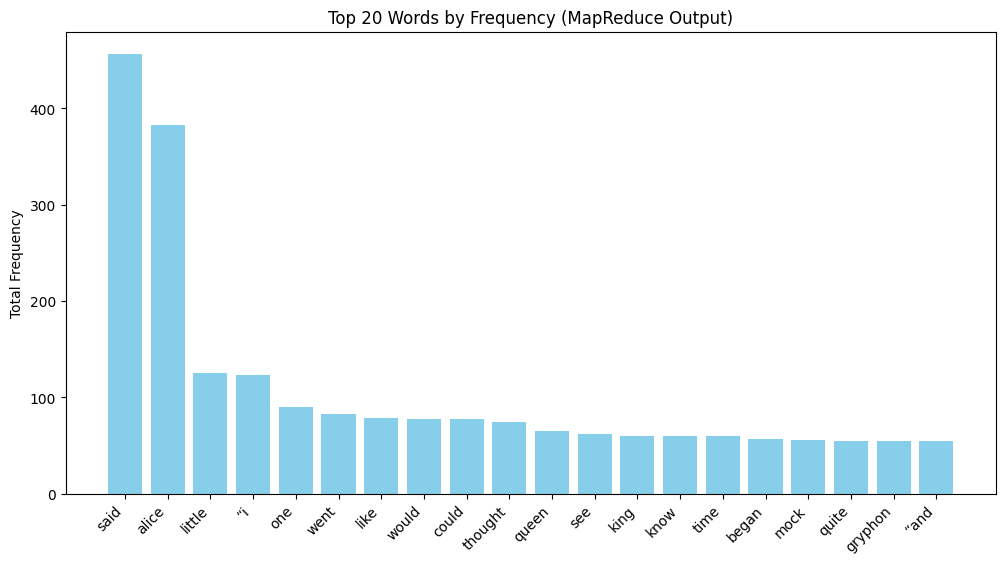

In [383]:
total_words = {}
counts = defaultdict(int)
docs_containing_word = defaultdict(set)

for (word_doc, val) in results:
    if word_doc[0] == "__total_words__":
        total_words[word_doc[1]] = val
    else:
        word, doc_id = word_doc
        counts[(word, doc_id)] = val
        docs_containing_word[word].add(doc_id)



df_words = pd.DataFrame([
    {'word': word, 'doc_id': doc_id, 'frequency': counts[(word, doc_id)], 
     'df': len(docs_containing_word[word])}
    for (word, doc_id) in counts
])

top_words = df_words.groupby('word')['frequency'].sum().sort_values(ascending=False).head(20)
print(top_words)

plt.figure(figsize=(12,6))
plt.bar(top_words.index, top_words.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Frequency")
plt.title("Top 20 Words by Frequency (MapReduce Output)")
plt.show()

<div dir="rtl" style="text-align: right;">

### ۳. محاسبه TF-IDF و تحلیل نتایج

در نهایت برای هر `(کلمه، فصل)` مقدار TF-IDF را طبق فرمول خواسته‌شده حساب کردم:


$$
TF = \frac{\text{تعداد تکرار کلمه}}{\text{تعداد کل کلمات فصل}}
$$

$$
IDF = \ln\!\left(\frac{N}{df(t)}\right)
$$


جایی که  
- \(N = 12\) تعداد فصل‌ها  
- \(df\) تعداد فصل‌هایی که کلمه در آن‌ها ظاهر شده  

وقتی heatmap و جدول بالاترین امتیازهای TF-IDF را تحلیل کردم، نکته جالب این بود که **کلمات پرتکرار مثل "said" و "alice" اصلاً TF-IDF بالایی نداشتند**. دلیل:

- این کلمات تقریباً در همه فصل‌ها بودند  
- بنابراین `IDF` نزدیک صفر شد  
- حتی اگر TF زیاد باشد، نتیجه TF-IDF همچنان پایین می‌ماند  

در عوض، کلماتی که خاص یک فصل بودند ناگهان بالا آمدند. مثلاً:

| کلمه | فصل | مقدار TF-IDF |
|------|------|--------------|
| **turtle** | ۱۰ | 0.0344 |
| **mock** | ۱۰ و ۹ | ~0.034 |
| **hatter** | ۷ و ۱۱ | ~0.034 |
| **caterpillar** | ۵ | 0.0305 |

این کلمات شاید در کل کتاب زیاد تکرار نشده باشند، اما چون فقط در فصل‌های خاصی دیده می‌شوند، در همان فصل‌ها اهمیت زیادی پیدا می‌کنند.


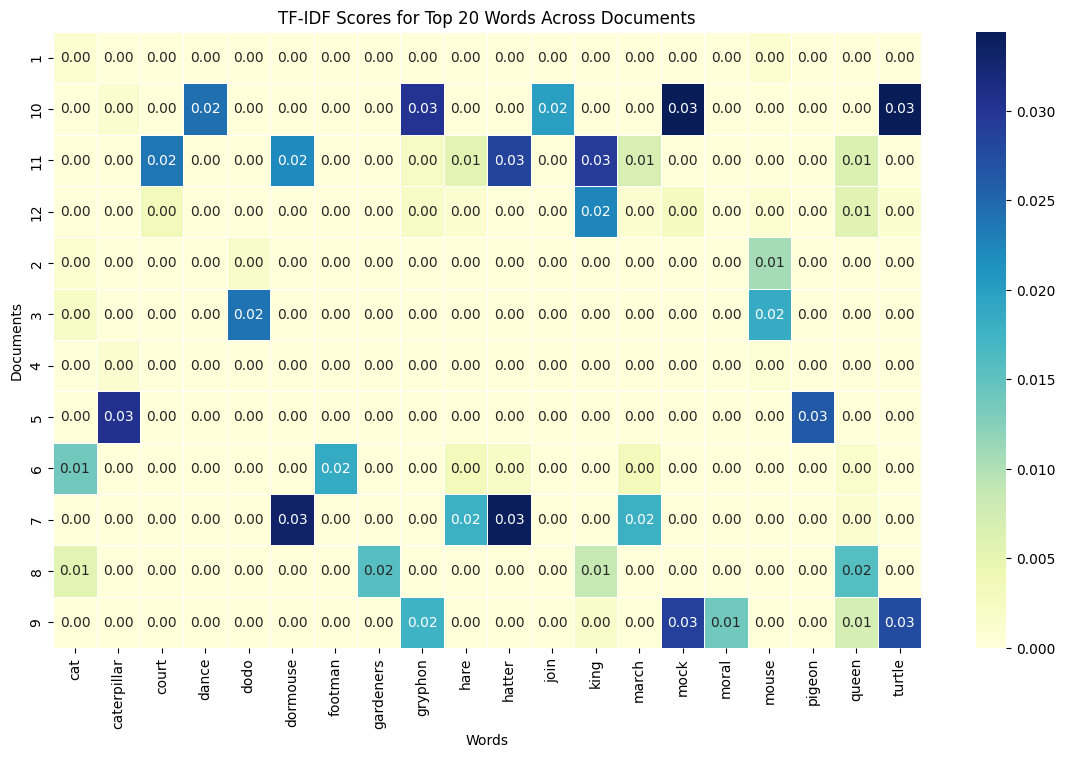

             word doc_id     tfidf
6712       turtle     10  0.034412
4231         mock     10  0.034412
3098       hatter      7  0.034203
2049     dormouse      7  0.033155
1418  caterpillar      5  0.030589
2979      gryphon     10  0.030192
3575         king     11  0.029326
4233         mock      9  0.028881
3096       hatter     11  0.028466
6714       turtle      9  0.027770
4813       pigeon      5  0.026319
1818        dance     10  0.024232
1998         dodo      3  0.023970
1705        court     11  0.023915
3576         king     12  0.022317
2048     dormouse     11  0.022075
3511         join     10  0.019826
2646      footman      6  0.018586
4269        mouse      3  0.018544
4075        march      7  0.017788


In [384]:

tfidf = {}
for (word, doc_id), freq in counts.items():
    tf = freq / total_words[doc_id]
    df = len(docs_containing_word[word])
    idf = math.log(N / df)
    tfidf[(word, doc_id)] = tf * idf

df_tfidf = pd.DataFrame([
    {'word': word, 'doc_id': doc_id, 'tfidf': score}
    for (word, doc_id), score in tfidf.items()
])

top_tfidf_words = df_tfidf.groupby('word')['tfidf'].max().sort_values(ascending=False).head(20).index
df_top_tfidf = df_tfidf[df_tfidf['word'].isin(top_tfidf_words)]

heatmap_data = df_top_tfidf.pivot(index='doc_id', columns='word', values='tfidf').fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".2f")
plt.title("TF-IDF Scores for Top 20 Words Across Documents")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.show()

print(df_top_tfidf.sort_values(by='tfidf', ascending=False).head(20))




<div dir="rtl" style="text-align: right;">

در کل این بخش نشان داد کلماتی که در ابتدا مهم به نظر می‌رسیدند (مثل said، alice و ...) بعد از حساب کردن TF-IDF تقریباً هیچ اهمیتی نداشتند، چون در همه فصل‌ها ظاهر شده بودند.

در عوض کلماتی که شاید فقط چند بار تکرار شده بودند اما **منحصر به یک فصل بودند**، وزن خیلی بالاتری گرفتند. این دقیقاً همان رفتاری است که از یک سیستم بازیابی اطلاعات انتظار داریم:  
**کلمه‌ای مهم است که هم در سند زیاد باشد و هم فقط در اسناد خاصی دیده شود.**

</div>


## <div style="text-align: right; direction: rtl;"> ج</div>


<div dir="rtl" style="text-align: right;">

##  استخراج ۱۰ کلمه با بیشترین امتیاز TF-IDF

در این بخش، هدف این بود که بفهمم چه کلماتی در کل کتاب «آلیس در سرزمین عجایب» نسبت به سایر کلمات، بیشترین اهمیت را دارند. برای این کار از محاسبه TF-IDF برای تمام کلمات ۱۲ فصل استفاده کردم و بعد ۱۰ کلمه با بیشترین مقدار TF-IDF را استخراج کردم.

### ۱. نتایج اصلی

کلمات با بیشترین TF-IDF و مقادیرشان به صورت زیر بودند:

| کلمه | امتیاز TF-IDF |
|-------|---------------|
| mock | 0.034412 |
| turtle | 0.034412 |
| hatter | 0.034203 |
| dormouse | 0.033155 |
| caterpillar | 0.030589 |
| gryphon | 0.030192 |
| king | 0.029326 |
| pigeon | 0.026319 |
| dance | 0.024232 |
| dodo | 0.023970 |



### ۲. تحلیل نتایج

- بیشتر کلماتی که در این لیست هستند، **نام شخصیت‌ها یا موجودات داستانی** هستند، مثل `hatter`، `dormouse`، `caterpillar`، `gryphon` و `dodo`. این نشان می‌دهد که TF-IDF به خوبی کلماتی را که منحصر به فصل‌های خاص هستند یا در کل کتاب کمتر تکرار شده‌اند، مشخص می‌کند.
- برخی کلمات مانند `king` و `dance` هم به وقایع و محیط داستان اشاره دارند و نشان می‌دهند که این کلمات در فصل‌های خاصی اهمیت زیادی داشته‌اند.
- در مجموع، این کلمات کاملاً **موضوعی با داستان کتاب مرتبط هستند** و نشان‌دهنده شخصیت‌ها و اتفاقات مهم هر فصل‌اند. به عبارتی، TF-IDF توانسته کلماتی را برجسته کند که به هسته‌ی محتوای داستان اشاره دارند، نه کلمات عمومی و رایج مثل `said`  که در تمام فصول تکرار شده‌اند.

</div>


In [386]:
tfidf = {}
for (word, doc_id), freq in counts.items():
    if doc_id not in total_words:
        total_words[doc_id] = sum(val for (w, d), val in counts.items() if d == doc_id)
    tf = freq / total_words[doc_id]
    df = len(docs_containing_word[word])
    idf = math.log(N / df)
    tfidf[(word, doc_id)] = tf * idf


In [387]:
df_tfidf = pd.DataFrame([
    {'word': word, 'doc_id': doc_id, 'tfidf': score}
    for (word, doc_id), score in tfidf.items()
])

max_tfidf_per_word = df_tfidf.groupby('word')['tfidf'].max()

top_10_words = max_tfidf_per_word.sort_values(ascending=False).head(10)

print("Top 10 words with highest TF-IDF scores:")
print(top_10_words)


Top 10 words with highest TF-IDF scores:
word
mock           0.034412
turtle         0.034412
hatter         0.034203
dormouse       0.033155
caterpillar    0.030589
gryphon        0.030192
king           0.029326
pigeon         0.026319
dance          0.024232
dodo           0.023970
Name: tfidf, dtype: float64


## <div style="text-align: right; direction: rtl;"> د</div>


<div dir="rtl" style="text-align: right;">

## تحلیل کلمه‌ی "alice" با استفاده از TF و TF-IDF

در این بخش، تمرکز  روی کلمه‌ی `alice` بود که نام شخصیت اصلی داستان است. هدف این بود که ببینیم این کلمه در سراسر ۱۲ فصل چگونه توزیع شده و مقدار TF-IDF آن چه معنایی دارد.


### ۱. مقادیر اصلی

- **تعداد اسناد شامل کلمه (DF):** 12  
- **IDF:** 0.0  

همان‌طور که مشخص است، کلمه‌ی `alice` در **تمام فصول کتاب تکرار شده است**. بنابراین DF برابر با کل تعداد اسناد است و IDF با فرمول ln(N/DF) صفر شد. این یعنی این کلمه در تقسیم‌بندی فصول **تمایز خاصی ندارد** و در تمام فصل‌ها حضور دارد.


In [398]:
word = "alice"

df = len(docs_containing_word[word]) if word in docs_containing_word else 0

N = total_docs

idf = math.log(N / df) if df > 0 else 0

print(f"Word: {word}")
print(f"Document Frequency (DF): {df}")
print(f"Inverse Document Frequency (IDF): {idf:.6f}")


Word: alice
Document Frequency (DF): 12
Inverse Document Frequency (IDF): 0.000000


<div dir="rtl" style="text-align: right;">


### ۲. مقادیر TF و TF-IDF در هر فصل

مقادیر TF و TF-IDF به شرح زیر هستند:

| فصل | TF | TF-IDF |
|-----|-----|--------|
| 1   | 0.0265 | 0.0 |
| 2   | 0.0226 | 0.0 |
| 3   | 0.0256 | 0.0 |
| 4   | 0.0224 | 0.0 |
| 5   | 0.0309 | 0.0 |
| 6   | 0.0322 | 0.0 |
| 7   | 0.0386 | 0.0 |
| 8   | 0.0307 | 0.0 |
| 9   | 0.0377 | 0.0 |
| 10  | 0.0257 | 0.0 |
| 11  | 0.0154 | 0.0 |
| 12  | 0.0203 | 0.0 |

- **TF (Term Frequency)** نشان‌دهنده نسبت تعداد تکرار کلمه به کل کلمات هر فصل است. می‌بینیم که مقدار TF در فصل‌های مختلف کمی متفاوت است، اما همگی در بازه 0.015 تا 0.038 قرار دارند.
- **TF-IDF** برای تمام فصل‌ها صفر است، زیرا IDF صفر است. این نتیجه طبیعی است، زیرا کلمه‌ای که در **تمام اسناد تکرار شده باشد، اهمیت تماتیک خاصی ندارد** و TF-IDF آن کوچک یا صفر خواهد بود.


### در مجموع:

- کلمه‌ی `alice` **کلمه‌ای کلیدی و پر تکرار** در کتاب است و در هر فصل حضور دارد.
- TF-IDF این کلمه صفر است، که نشان می‌دهد **TF-IDF به خوبی می‌تواند کلمات عمومی و پرتکرار در کل متن را از کلمات منحصر به فصل جدا کند**.
- اگر بخواهیم کلمات مهم برای **تم هر فصل** را پیدا کنیم، باید روی کلماتی تمرکز کنیم که **در برخی فصل‌ها تکرار شده‌اند اما در بقیه کمتر هستند**.  

</div>


In [395]:
tf_values = {}
tfidf_values = {}

for doc_id in total_words:
    freq = counts.get((word, doc_id), 0)
    tf = freq / total_words[doc_id] if total_words[doc_id] > 0 else 0
    tfidf = tf * idf
    tf_values[doc_id] = tf
    tfidf_values[doc_id] = tfidf

import pandas as pd

df_alice = pd.DataFrame({
    'doc_id': tf_values.keys(),
    'TF': tf_values.values(),
    'TF-IDF': tfidf_values.values()
}).sort_values(by='TF-IDF', ascending=False)

print(df_alice)


   doc_id        TF  TF-IDF
0       1  0.026523     0.0
1      10  0.025709     0.0
2      11  0.015400     0.0
3      12  0.020314     0.0
4       2  0.022642     0.0
5       3  0.025641     0.0
6       4  0.022446     0.0
7       5  0.030891     0.0
8       6  0.032162     0.0
9       7  0.038551     0.0
10      8  0.030733     0.0
11      9  0.037660     0.0


## <div style="text-align: right; direction: rtl;"> ه</div>



<div dir="rtl" style="text-align: right;">

## تحلیل TF و TF-IDF برای کلمات با فراوانی بالا و پایین

در این بخش، هدف بررسی تأثیر مقدار TF و IDF بر روی مقدار نهایی TF-IDF بود. برای این منظور، یک کلمه با **فراوانی بالا (High TF)** و یک کلمه با **فراوانی پایین (Low TF)** انتخاب شد و مقادیر TF، DF، IDF و TF-IDF آنها محاسبه شد.


### ۱. کلمه با فراوانی بالا (High TF)

- **کلمه:** `said`  
- **TF در فصل 1:** 0.007859  
- **DF (تعداد فصل‌هایی که شامل این کلمه هستند):** 12  
- **IDF:** 0.0  
- **TF-IDF:** 0.0  


- این کلمه بسیار پرکاربرد است و تقریباً در **تمام فصول** ظاهر شده است.  
- به دلیل اینکه DF برابر با کل تعداد اسناد است، IDF صفر می‌شود و در نتیجه مقدار TF-IDF نیز صفر خواهد شد.  
- این نتیجه منطقی است، زیرا کلماتی که در تمام اسناد وجود دارند، اطلاعات خاصی برای تمایز فصل‌ها ارائه نمی‌دهند و سیستم‌های بازیابی اطلاعات ترجیح می‌دهند این کلمات را بی‌اهمیت بدانند.


In [399]:
df_analysis = pd.DataFrame([
    {'word': word, 'doc_id': doc_id, 'tf': freq / total_words[doc_id],
     'df': len(docs_containing_word[word]), 
     'idf': math.log(N / len(docs_containing_word[word])),
     'tfidf': (freq / total_words[doc_id]) * math.log(N / len(docs_containing_word[word]))}
    for (word, doc_id), freq in counts.items()
])

high_tf_word = (
    df_analysis.groupby('word')['tf']
    .mean()
    .sort_values(ascending=False)
    .head(1)
).index[0]

df_high_tf = df_analysis[df_analysis['word'] == high_tf_word].sort_values(by="tfidf", ascending=False)

print("High TF Word Analysis:")
print(df_high_tf.head(1))



High TF Word Analysis:
      word doc_id        tf  df  idf  tfidf
5367  said      1  0.007859  12  0.0    0.0



<div dir="rtl" style="text-align: right;">


### ۲. کلمه با فراوانی پایین (Low TF)

- **کلمه:** `abide`  
- **TF در فصل 6:** 0.000748  
- **DF (تعداد فصل‌هایی که شامل این کلمه هستند):** 1  
- **IDF:** 2.484907  
- **TF-IDF:** 0.001859  

- این کلمه در کل کتاب بسیار کم‌تکرار است و فقط در یک فصل ظاهر شده است.  
- به دلیل اینکه DF خیلی کوچک است، IDF مقدار بزرگی می‌گیرد و باعث می‌شود که حتی با TF پایین، TF-IDF مقدار معناداری پیدا کند.  
- این رفتار دقیقاً همان چیزی است که در **سیستم‌های بازیابی اطلاعات** مطلوب است: کلماتی که منحصر به یک یا چند سند هستند و می‌توانند اطلاعات  مهمی ارائه دهند، نسبت به کلمات عمومی وزن بالاتری دارند.




In [400]:
low_tf_word = (
    df_analysis.groupby('word')['tf']
    .mean()
    .sort_values(ascending=True)
    .head(1)
).index[0]

df_low_tf = df_analysis[df_analysis['word'] == low_tf_word].sort_values(by="tfidf", ascending=False)

print("\n Low TF Word Analysis:")
print(df_low_tf.head(1))



 Low TF Word Analysis:
      word doc_id        tf  df       idf     tfidf
666  abide      6  0.000748   1  2.484907  0.001859



<div dir="rtl" style="text-align: right;">

### در مجموع

- کلمات با **TF بالا اما پراکنده در همه اسناد** (مثل `said`) TF-IDF پایین دارند و بنابراین از نظر سیستم اطلاعاتی اهمیت کمتری پیدا می‌کنند.  
- کلمات با **TF پایین اما خاص یک یا چند سند** (مثل `abide`) TF-IDF بالاتری دارند و به خوبی می‌توانند تم یا محتوای آن سند را مشخص کنند.  
- این مکانیزم TF-IDF به سیستم‌های بازیابی اطلاعات کمک می‌کند که **کلمات عمومی و پرتکرار را فیلتر کنند** و به جای آن، کلمات منحصر به سندها و مهم برای تم متن را برجسته کنند.


In [401]:
print("\n Explanation Summary")
print(f"- High TF word: {high_tf_word}")
print(f"- Low TF word: {low_tf_word}")


 Explanation Summary
- High TF word: said
- Low TF word: abide
